## Price Prediction
### Task Details
Predict the price of the car based on the features in the dataset.

### Evaluation
A model with good r^2_score.

### Data fields

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
os.getcwd()

'C:\\Users\\my pc\\Desktop\\PYTHON\\House_Prediction'

In [5]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [7]:
pd.set_option('max_rows',500)
pd.set_option('max_columns',500)

In [8]:
train=pd.read_csv('train.csv',delimiter=',')  ##reading it from CSV
train.to_csv('train.csv',index=False)   ##To save data into your system

In [9]:
test=pd.read_csv('test.csv',delimiter=',')  ##reading it from CSV
test.to_csv('test.csv',index=False)   ##To save data into your system

In [10]:
sample_submission=pd.read_csv('sample_submission.csv',delimiter=',')  ##reading it from CSV
sample_submission.to_csv('sample_submission.csv',index=False)   ##To save data into your system

In [11]:
display(len(train),len(test))

1460

1459

In [12]:
display(train.shape,test.shape)

(1460, 81)

(1459, 80)

In [13]:
data = pd.concat(objs = [train, test], axis = 0)   ##Merging train and test datasets to form a master datset
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [15]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [16]:
data.describe(include='O')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      2915   2919   198     2919        2919      2917      2919   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       2265   2907   120     1859        2622      2916      2133   

       LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
count       2919         2919       2919       2919     2919       2919   
unique         3           25          9          8        5          8   
top          Gtl        NAmes       Norm       Norm     1Fam     1Story   
freq        2778          443       2511       2889     2425       1471   

       RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual  \
count       2919     2919        2918        2918       2895      2919   
unique         6        8          15          16          4         4   
top        Gable  CompShg     VinylSd     VinylSd       None        TA   
freq        2310     2876        1025        1014       1742      1798   

       ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
count       2919       2919     2838     2837         2837         2840   
unique         5          6        4        4            4            6   
top           TA      PConc       TA       TA           No          Unf   
freq        2538       1308     1283     2606         1904          851   

       BsmtFinType2 Heating HeatingQC CentralAir Electrical KitchenQual  \
count          2839    2919      2919       2919       2918        2918   
unique            6       6         5          2          5           4   
top             Unf    GasA        Ex          Y      SBrkr          TA   
freq           2493    2874      1493       2723       2671        1492   

       Functional FireplaceQu GarageType GarageFinish GarageQual GarageCond  \
count        2917        1499       2762         2760       2760       2760   
unique          7           5          6            3          5          5   
top           Typ          Gd     Attchd          Unf         TA         TA   
freq         2717         744       1723         1230       2604       2654   

       PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
count        2919     10    571         105     2918          2919  
unique          3      3      4           4        9             6  
top             Y     Gd  MnPrv        Shed       WD        Normal  
freq         2641      4    329          95     2525          2402

In [17]:
data.dtypes   ##checking the datatypes of each variable of data

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [18]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
data.shape  ##returns the shape of an array. Shape is a tuple that gives dimensions of the array.

(2919, 81)

## Exploratory Data Analysis(EDA)

In [20]:
data.duplicated().sum()  ##checking total no. of duplicated values in data

0

In [21]:
data.isnull().sum()    ##tells us about the total no. of missing values(NA's) in each variable of data

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Wrangling

In [22]:
##Number of missing values of 'PoolQC' column.
m_1 = data['PoolQC'].isnull().sum()
print("The number of missing value in PoolQC: ",m_1)

The number of missing value in PoolQC:  2909


In [23]:
##Percentage of nan values.
total_num_cells = np.product(data['PoolQC'].shape)
percent_of_nan = (m_1/total_num_cells)*100
print("The percentage of missing value in PoolQC: ",percent_of_nan,"%")

The percentage of missing value in PoolQC:  99.65741692360398 %


In [24]:
data.drop(['PoolQC'],axis=1,inplace=True)   ##NaN values in PoolQC is 99.65%;dropping column as missing values are very high  
data.head()                                 ##and have no impact on target variable.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [25]:
##similarly,number of missing values of 'Fence' column.
m_2 = data['Fence'].isnull().sum()
print("The number of missing value in Fence: ",m_2)

The number of missing value in Fence:  2348


In [26]:
##Percentage of nan values.
total_num_cells = np.product(data['Fence'].shape)
percent_of_nan = (m_2/total_num_cells)*100
print("The percentage of missing value in Fence: ",percent_of_nan,"%")

The percentage of missing value in Fence:  80.4385063377869 %


In [27]:
data.drop(['Fence'],axis=1,inplace=True)   ##NaN values in Fence is 80.43%;dropping column as missing values are very high  
data.head()                                 ##and have no impact on target variable.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [28]:
##similarly,number of missing values of 'MiscFeature' column.
m_3 = data['MiscFeature'].isnull().sum()
print("The number of missing value in MiscFeature: ",m_3)

The number of missing value in MiscFeature:  2814


In [29]:
##Percentage of nan values.
total_num_cells = np.product(data['MiscFeature'].shape)
percent_of_nan = (m_3/total_num_cells)*100
print("The percentage of missing value in MiscFeature: ",percent_of_nan,"%")

The percentage of missing value in MiscFeature:  96.40287769784173 %


In [30]:
data.drop(['MiscFeature'],axis=1,inplace=True)   ##NaN values in MiscFeature is 96.40%;dropping column as missing values are very high  
data.head()                                 ##and have no impact on target variable.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [31]:
##similarly,number of missing values of 'Alley' column.
m_4 = data['Alley'].isnull().sum()
print("The number of missing value in Alley: ",m_4)

The number of missing value in Alley:  2721


In [32]:
##Percentage of nan values.
total_num_cells = np.product(data['Alley'].shape)
percent_of_nan = (m_4/total_num_cells)*100
print("The percentage of missing value in Alley: ",percent_of_nan,"%")

The percentage of missing value in Alley:  93.21685508735868 %


In [33]:
data.drop(['Alley'],axis=1,inplace=True)   ##NaN values in Alley is 93.21%;dropping column as missing values are very high  
data.head()                                 ##and have no impact on target variable.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd   
3  

In [34]:
##similarly,number of missing values of 'FireplaceQu' column.
m_5 = data['FireplaceQu'].isnull().sum()
print("The number of missing value in FireplaceQu: ",m_5)

The number of missing value in FireplaceQu:  1420


In [35]:
##Percentage of nan values.
total_num_cells = np.product(data['FireplaceQu'].shape)
percent_of_nan = (m_5/total_num_cells)*100
print("The percentage of missing value in FireplaceQu: ",percent_of_nan,"%")

The percentage of missing value in FireplaceQu:  48.646796848235695 %


In [36]:
data.drop(['FireplaceQu'],axis=1,inplace=True)   ##NaN values in FireplaceQu is 48.64%;dropping column as missing values are very high  
data.head()                                 ##and have no impact on target variable.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0         2         1             3             1   
1           0.0           1.0         2         0             3             1   
2           1.0           0.0         2         1             3             1   
3           1.0           0.0         1         0             3             1   
4           1.0           0.0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

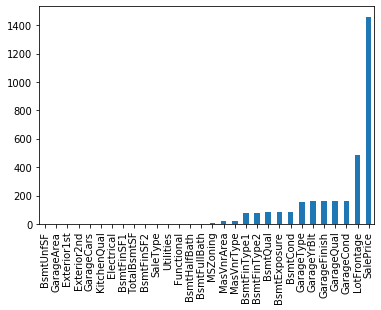

In [37]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [38]:
data.isnull().sum()    ##tells us about the leftover total no. of missing values(NA's) in each variable of data

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

## Replace missing values: mode for strings & median for numerics

In [39]:
for c in data.drop(['SalePrice'],axis=1):
    if data[c].dtype == 'object':
        data[c] = data[c].fillna(data[c].mode()[0])
    else:
        data[c] = data[c].fillna(data[c].median())

In [40]:
data.isnull().sum()
##Now,looks like the perfect dataset!!! No null values.

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [41]:
##For categorical values we replace missing values with most occurred values
print(data['MasVnrType'].value_counts())

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64


In [42]:
print(data['BsmtQual'].value_counts())

TA    1364
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64


In [43]:
print(data['BsmtCond'].value_counts())

TA    2688
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64


In [44]:
print(data['BsmtExposure'].value_counts())

No    1986
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64


In [45]:
print(data['BsmtFinType1'].value_counts())

Unf    930
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64


In [46]:
print(data['BsmtFinType2'].value_counts())

Unf    2573
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [47]:
print(data['GarageType'].value_counts())

Attchd     1880
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64


In [48]:
print(data['GarageFinish'].value_counts())

Unf    1389
RFn     811
Fin     719
Name: GarageFinish, dtype: int64


In [49]:
print(data['GarageQual'].value_counts())

TA    2763
Fa     124
Gd      24
Po       5
Ex       3
Name: GarageQual, dtype: int64


In [50]:
print(data['GarageCond'].value_counts())

TA    2813
Fa      74
Gd      15
Po      14
Ex       3
Name: GarageCond, dtype: int64


In [51]:
print(data['Electrical'].value_counts())

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64


In [52]:
print(data['MSZoning'].value_counts())

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64


In [53]:
print(data['Utilities'].value_counts())

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64


In [54]:
print(data['Exterior1st'].value_counts())

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64


In [55]:
print(data['Exterior2nd'].value_counts())

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
Stucco       47
BrkFace      47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64


In [56]:
print(data['KitchenQual'].value_counts())

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64


In [57]:
print(data['Functional'].value_counts())

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64


In [58]:
print(data['SaleType'].value_counts())

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64


## Data_Visualisation

### Univariate_Analysis

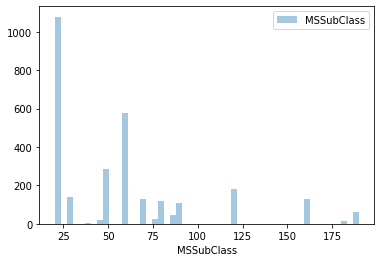

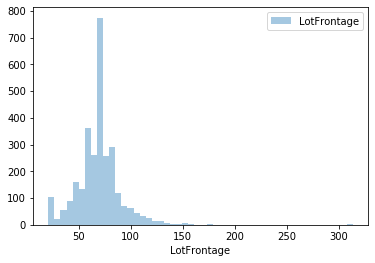

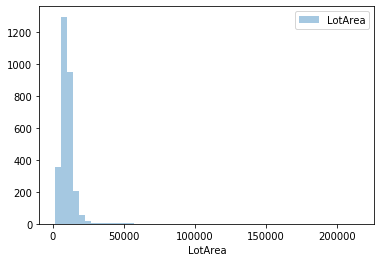

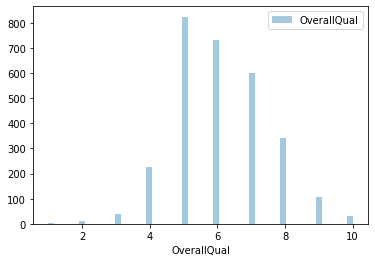

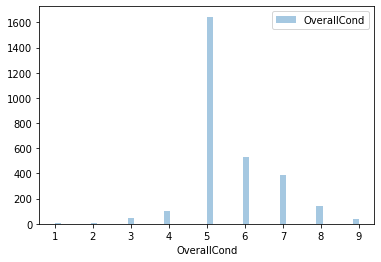

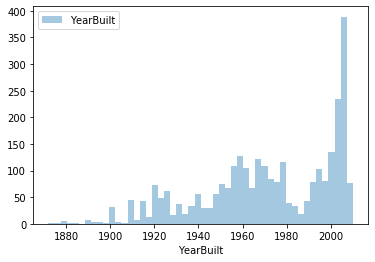

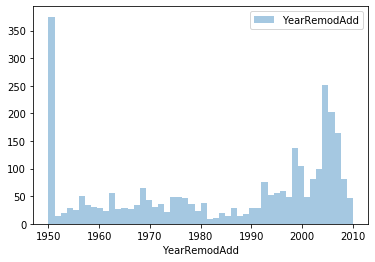

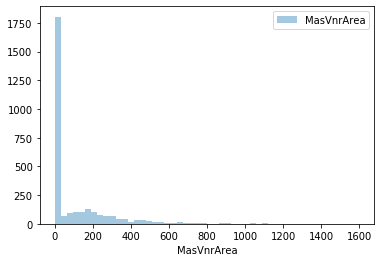

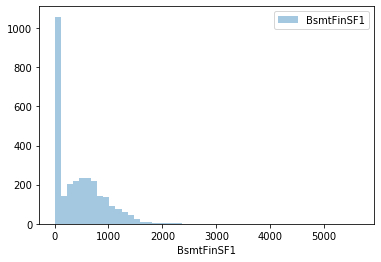

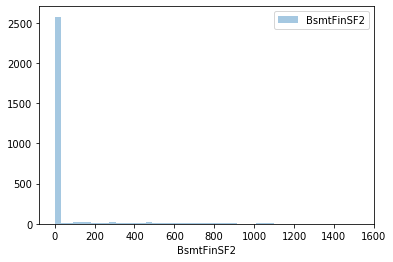

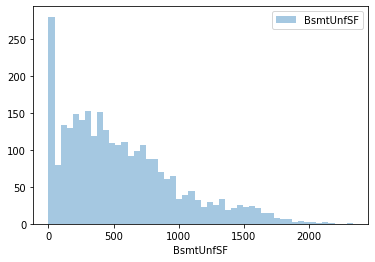

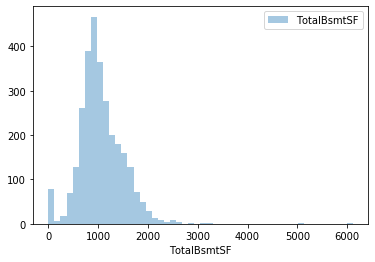

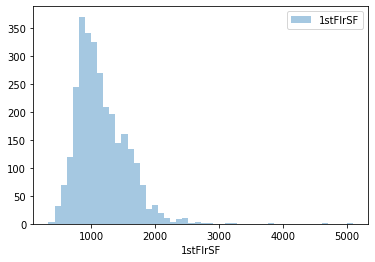

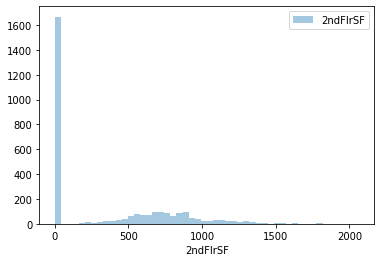

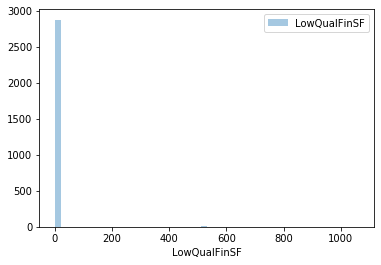

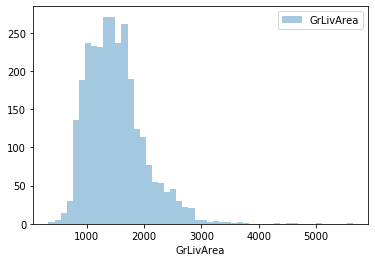

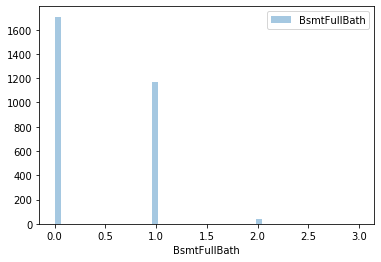

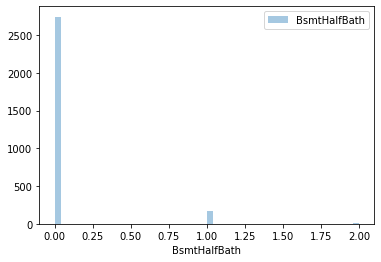

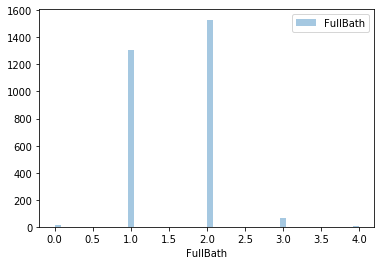

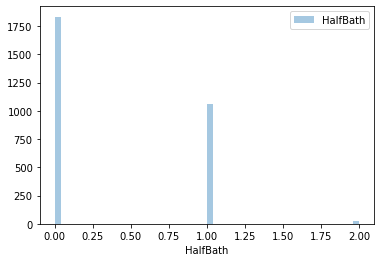

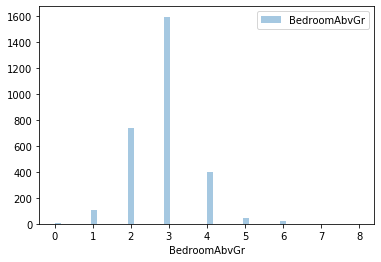

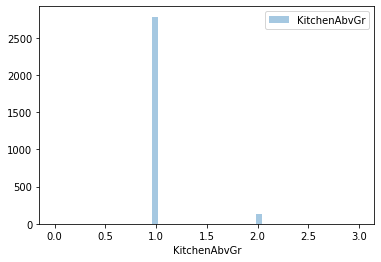

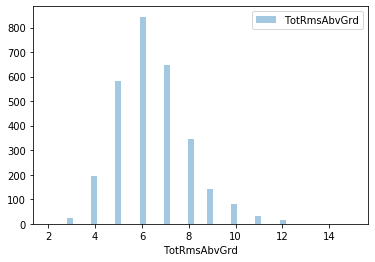

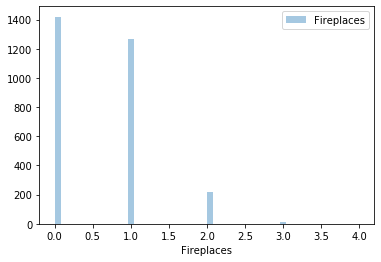

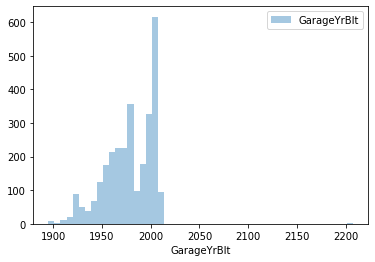

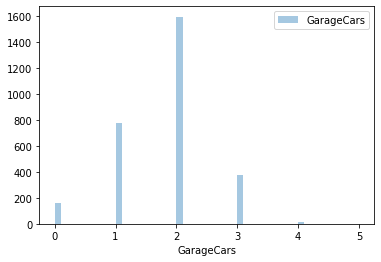

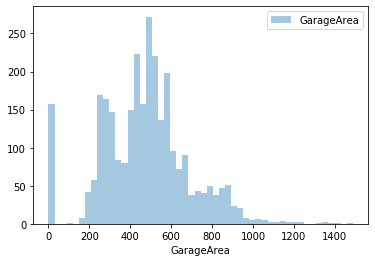

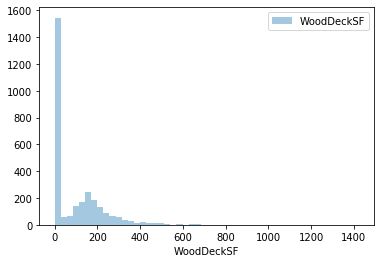

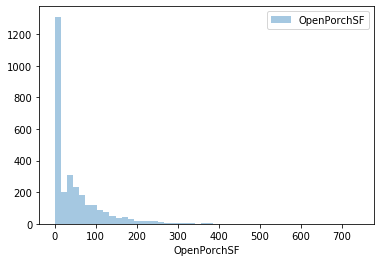

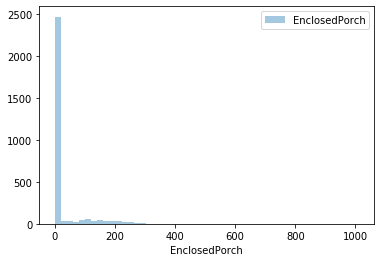

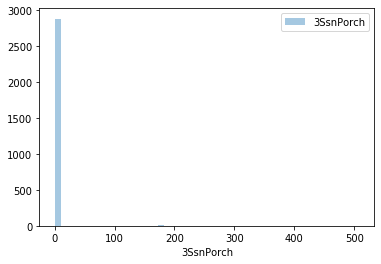

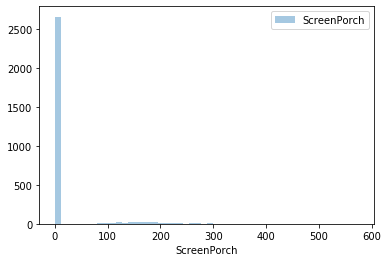

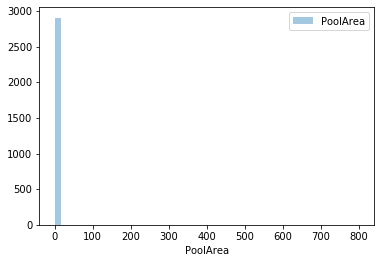

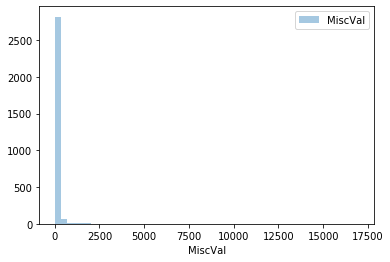

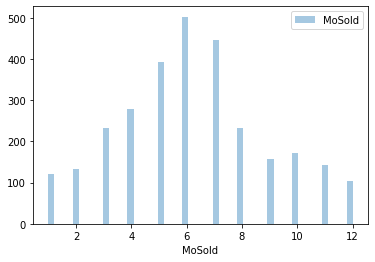

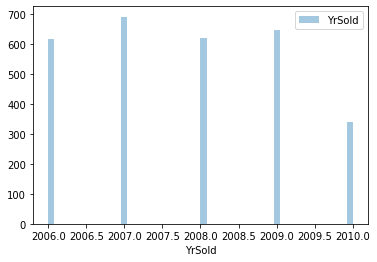

In [59]:
for val in data.drop(['Id', 'MSZoning', 'Street','LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType','HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating','HeatingQC', 'CentralAir', 'Electrical','KitchenQual',
       'Functional','GarageType','GarageFinish', 'GarageQual','GarageCond', 'PavedDrive',
       'SaleType','SaleCondition', 'SalePrice'], axis = 1):
    sns.distplot(data[val], kde = False,bins=50,label=val)
    plt.legend()
    plt.show()

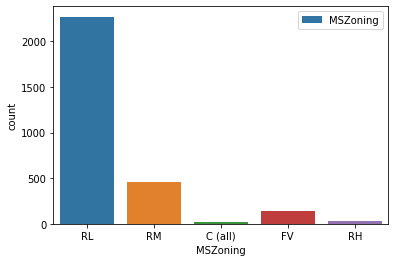

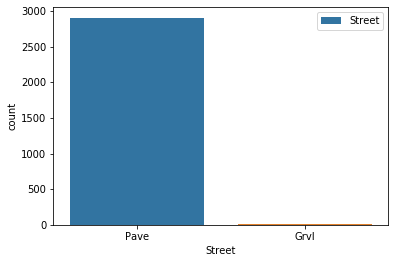

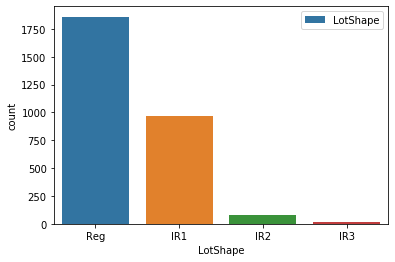

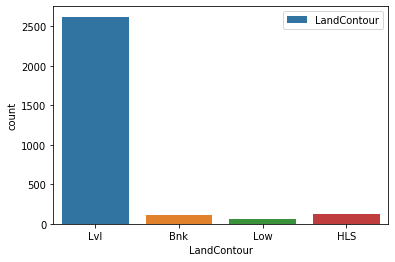

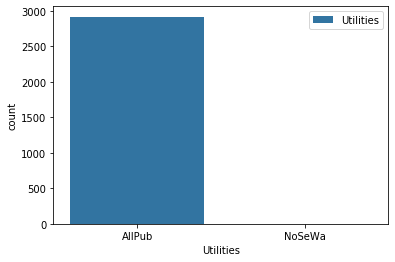

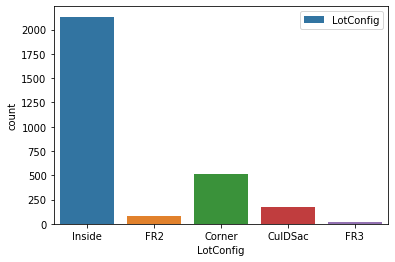

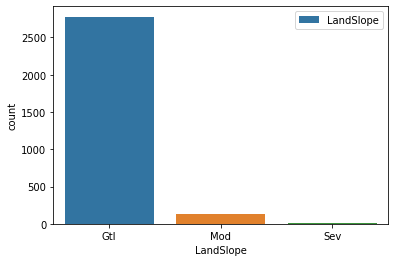

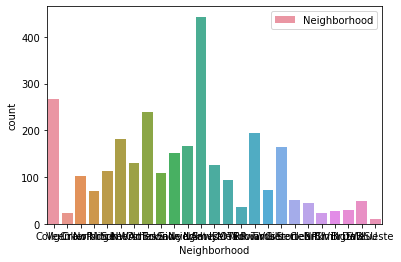

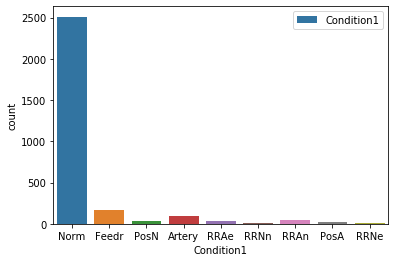

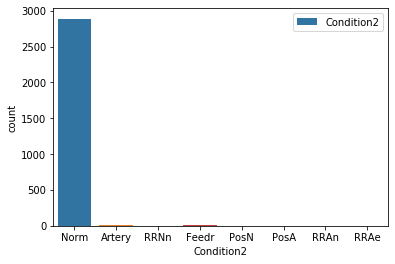

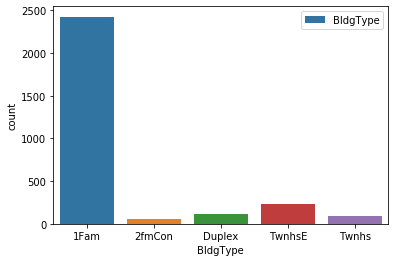

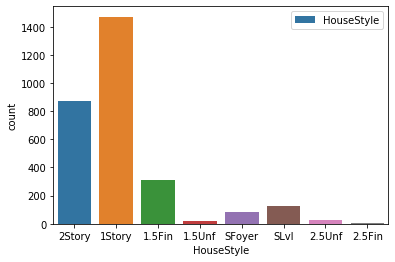

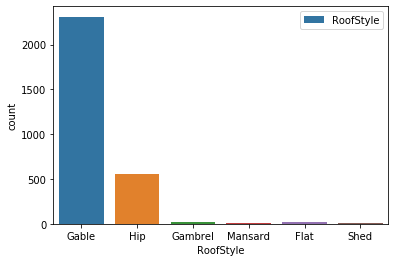

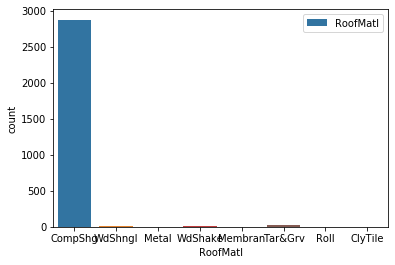

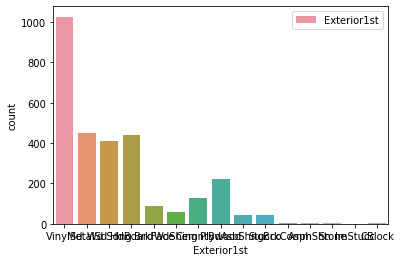

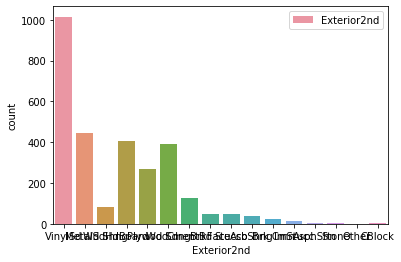

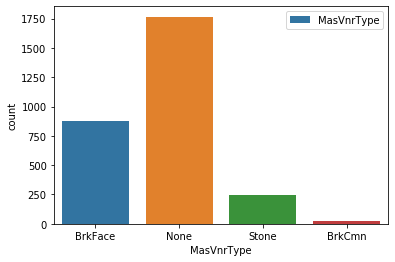

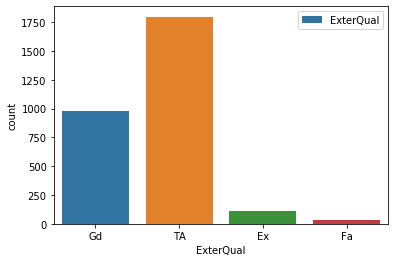

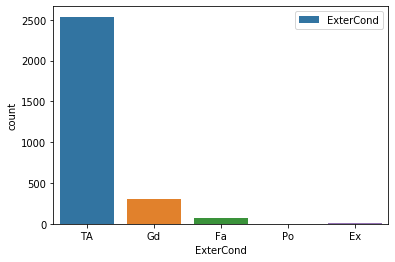

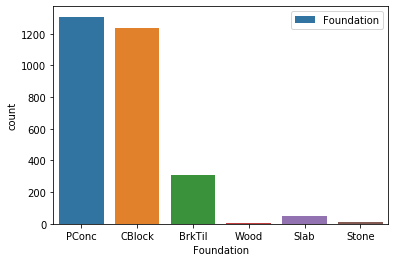

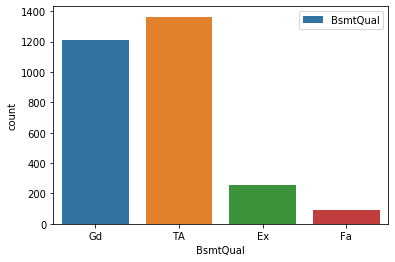

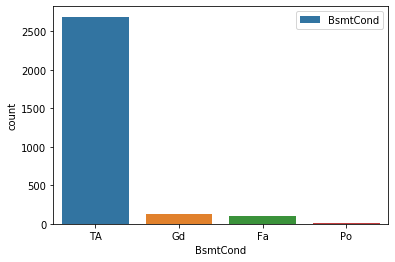

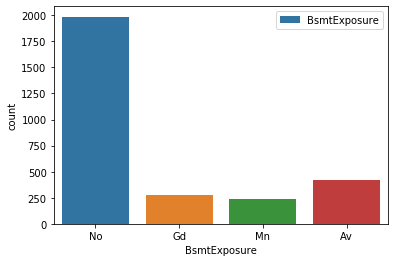

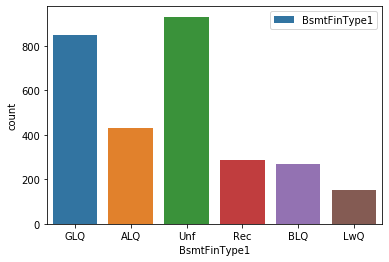

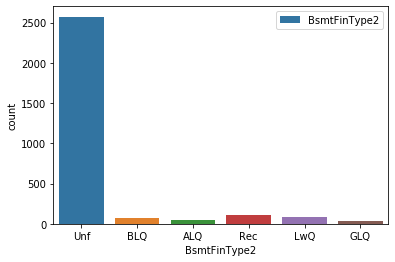

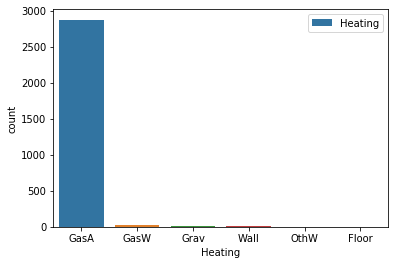

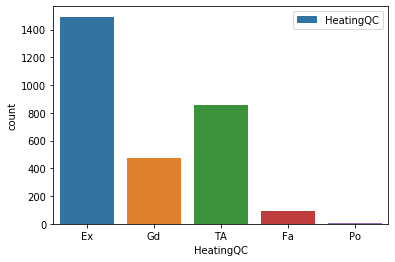

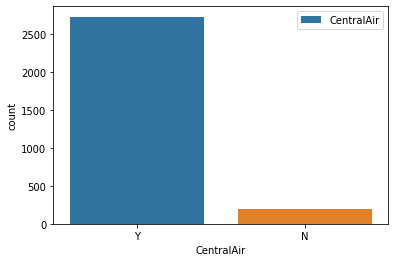

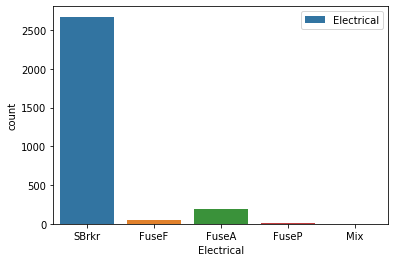

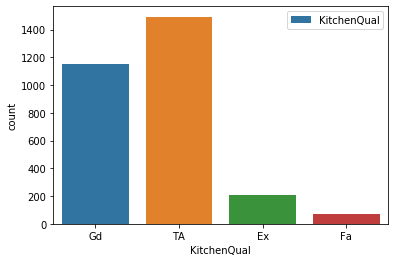

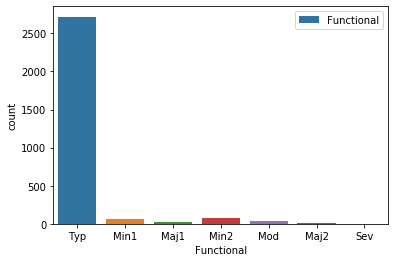

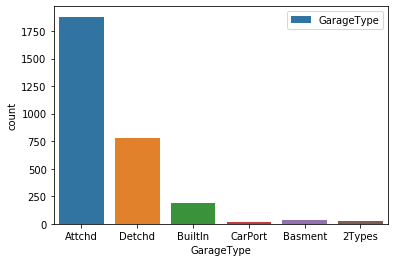

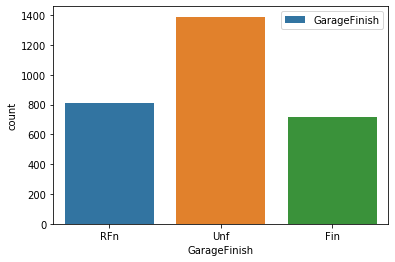

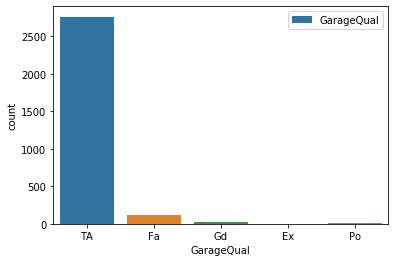

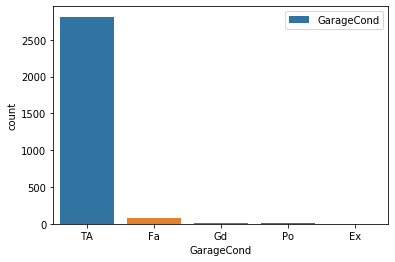

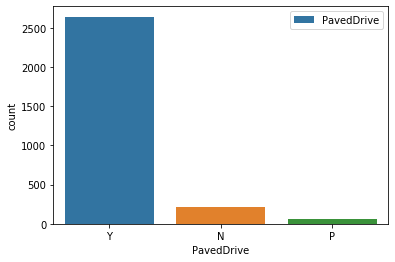

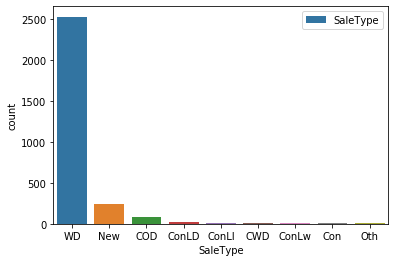

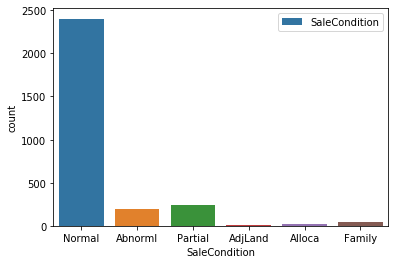

In [60]:
for val in data.drop(['Id','MSSubClass', 'LotFrontage','LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                      'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',
                     'TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold','SalePrice'],axis=1):
    sns.countplot(data[val],label=val)
    plt.legend()
    plt.show()

In [61]:
train['SalePrice'].describe()    ##describe the target 'SalePrice'

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [62]:
##Skewness and Kurtosis for Target Variable
print('Skewness :',train['SalePrice'].skew())
print('Kurtosis :',train['SalePrice'].kurt())

Skewness : 1.8828757597682129
Kurtosis : 6.536281860064529


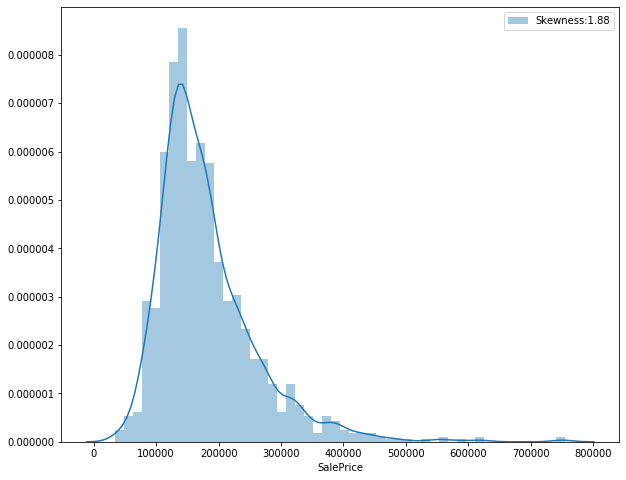

In [63]:
##Plot the distplot of target
plt.figure(figsize=(10,8))
y = train['SalePrice']
sns.distplot(y, kde=True,bins=50,label=val)
plt.legend(['Skewness:{:.2f}'.format(y.skew())])
plt.show()

Skewness =  0.12133506220520406


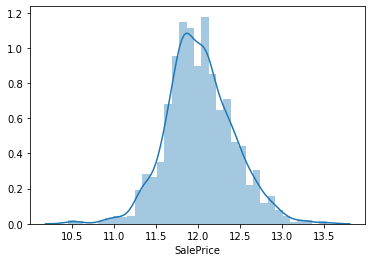

In [64]:
sns.distplot(np.log(train.SalePrice))
print('Skewness = ',np.log(train.SalePrice).skew())
##To reduce the skewness,take log of SalePrice
##And the skewness for the log SalePrice is 0.12 which is very close to normal

In [65]:
high_corr=train.corr()
high_corr_features=high_corr.index[abs(high_corr['SalePrice'])>=0.5]

In [66]:
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

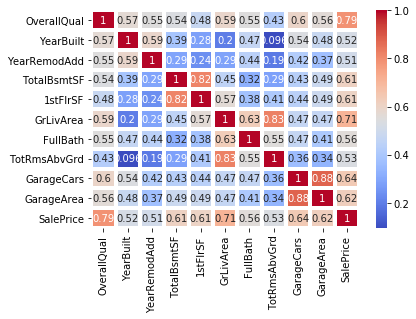

In [67]:
sns.heatmap(train[high_corr_features].corr(),cmap='coolwarm',annot=True,linewidth=3)

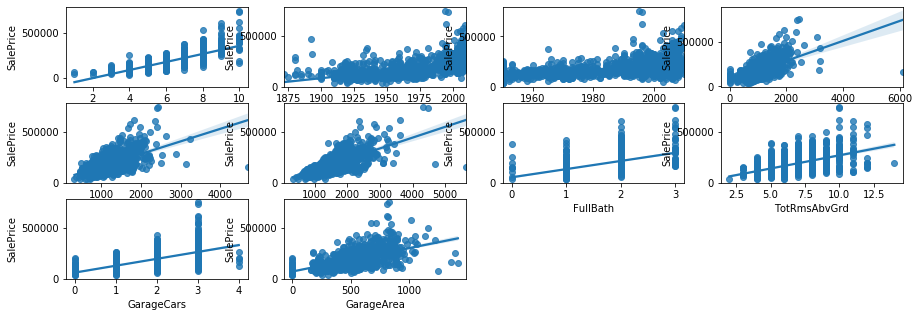

In [68]:
plt.figure(figsize=(15,5))
for i in range(len(high_corr_features)):
    if i<=9:
        plt.subplot(3,4,i+1)
        sns.regplot(data=train,x=high_corr_features[i],y='SalePrice')

In [69]:
##Calculating Statistics

##Minimum price of the train_data
minimum_price = np.min(train['SalePrice'])

##Maximum price of the train_data
maximum_price = np.max(train['SalePrice'])

##Mean price of the train_data
mean_price = np.mean(train['SalePrice'])

##Median price of the train_data
median_price = np.median(train['SalePrice'])

##Standard deviation of prices of the train_data
std_price = np.std(train['SalePrice'])

##No.of missing values in data
missing_values= data['SalePrice'].isnull().sum()

##Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price:", minimum_price)
print("Maximum price:",maximum_price)
print("Mean price:",mean_price)
print("Median price:",median_price)
print("Standard deviation of price:",std_price)
print("Total no. of missing values in SalesPrice:",missing_values)

Statistics for Boston housing dataset:

Minimum price: 34900
Maximum price: 755000
Mean price: 180921.19589041095
Median price: 163000.0
Standard deviation of price: 79415.29188606751
Total no. of missing values in SalesPrice: 1459


## Feature_Engineering

In [70]:
data['total_bathrooms']=data['BsmtFullBath']+(0.5*data['BsmtHalfBath'])+data['FullBath']+(0.5*data['HalfBath'])
data.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1,inplace=True)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0           0     Attchd       2003.0          RFn         2.0       548.0   
1           1     Attchd       1976.0          RFn         2.0       460.0   
2           1     Attchd       2001.0          RFn         2.0       608.0   
3           1     Detchd       1998.0          Unf         3.0   

In [71]:
data['total_bathrooms'].unique()

array([3.5, 2.5, 2. , 3. , 4. , 1. , 1.5, 4.5, 6. , 5. , 7. ])

In [72]:
data['total_bathrooms'].value_counts()

2.0    902
2.5    558
1.0    443
3.0    378
1.5    293
3.5    289
4.0     31
4.5     17
7.0      3
5.0      3
6.0      2
Name: total_bathrooms, dtype: int64

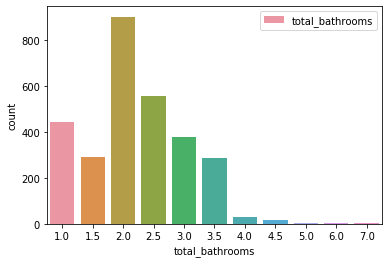

In [73]:
sns.countplot(data['total_bathrooms'],label='total_bathrooms')
plt.legend()
plt.show()

In [74]:
print(data['PoolArea'].value_counts())
print(data['GarageYrBlt'].value_counts())

0      2906
561       1
555       1
519       1
800       1
738       1
648       1
576       1
512       1
480       1
444       1
368       1
228       1
144       1
Name: PoolArea, dtype: int64
1979.0    194
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
1977.0     66
2008.0     61
1998.0     58
2000.0     55
1999.0     54
2002.0     53
1950.0     51
1976.0     50
1993.0     49
1968.0     48
1997.0     44
1958.0     42
1978.0     41
2001.0     41
1956.0     41
1996.0     40
1966.0     39
1994.0     39
1960.0     37
1954.0     37
1967.0     36
1959.0     36
1962.0     35
1995.0     35
1964.0     35
1974.0     35
1965.0     34
1963.0     34
1957.0     34
1920.0     33
1970.0     32
1980.0     32
1969.0     32
1961.0     31
1973.0     29
2009.0     29
1975.0     28
1972.0     27
1930.0     27
1992.0     27
1990.0     26
1940.0     25
1955.0     24
1971.0     24
1953.0     23
1939.0     21
1988.0     20
1948.0     19
1984.0     19
1989.0     19
1985.0     18
1987.

In [75]:
data['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953., 1979., 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926., 1955.,
       1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924., 1996.,
       1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925., 1941.,
       2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928., 1922.,
       1934., 1906., 1914., 1946., 1908., 1929., 1933., 1917., 1896.,
       1895., 2207., 1943., 1919.])

In [76]:
data.drop(['PoolArea','GarageYrBlt','Utilities'],axis=1,inplace=True)  
##GarageYrBlt column can be removed from data as this variable don't have such huge impact on target.
##and also,at the time of creation of dummy variables lot of dummies will be created as this variable is having 103 unique values.

##Removing PoolArea from data as 2906 values of 2919 values are having the same data;so no impact moreover.
##Removing Utilities from data as 2918 values of 2919 values are having the same data;so no impact moreover.

data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn         2.0       548.0         TA   
1           1     Attchd          RFn         2.0       460.0         TA   
2           1     Attchd          RFn         2.0       608.0         TA   
3           1     Detchd          Unf         3.0       642.0         TA   
4           1     Attchd          RFn         3.0       8

In [77]:
data.drop(['YrSold','MoSold'],axis=1,inplace=True)  ##MoSold,YrSold columns can be removed from data as lot of dummy variables will 
data.head()   ##be created during the time of making dummies and moreover these variables don't have any significant impact on target.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   
2             3             1          Gd             6        Typ   
3             3             1          Gd             7        Typ   
4             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn         2.0       548.0         TA   
1           1     Attchd          RFn         2.0       460.0         TA   
2           1     Attchd          RFn         2.0       608.0         TA   
3           1     Detchd          Unf         3.0       642.0         TA   
4           1     Attchd          RFn         3.0       8

In [78]:
data['LowQualFinSF'].unique()

array([   0,  360,  513,  234,  528,  572,  144,  392,  371,  390,  420,
        473,  156,  515,   80,   53,  232,  481,  120,  514,  397,  479,
        205,  384,  362, 1064,  431,  436,  259,  312,  108,  697,  512,
        114,  140,  450], dtype=int64)

In [79]:
data['LowQualFinSF'].value_counts()

0       2879
80         4
205        2
360        2
390        1
384        1
362        1
312        1
234        1
232        1
420        1
156        1
144        1
140        1
120        1
114        1
108        1
392        1
697        1
515        1
371        1
513        1
481        1
479        1
473        1
431        1
397        1
259        1
450        1
53         1
1064       1
572        1
528        1
514        1
512        1
436        1
Name: LowQualFinSF, dtype: int64

In [80]:
data.drop(['LowQualFinSF'],axis=1,inplace=True)
data.head()

##Removing LowQualFinSF from data as 2879 values i.e.,approximately 90% data of 2919 values are identical;so no impact moreover. 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  \
0          Y      SBrkr       856       854       1710             3   
1          Y      SBrkr      1262         0       1262             3   
2          Y      SBrkr       920       866       1786             3   
3          Y      SBrkr       961       756       1717             3   
4          Y      SBrkr      1145      1053       2198             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     Attchd   
3             1          Gd             7        Typ           1     Detchd   
4             1          Gd             9        Typ           1     Attchd   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn         2.0       548.0         TA         TA          Y   
1          RFn         2.0       460.0         TA         TA          Y   
2          RFn         2.0       608.0         TA         TA          Y   
3          Unf         3.0       642.0         TA         TA          Y   
4       

In [81]:
data['total_porch_sf']=data['WoodDeckSF']+data['OpenPorchSF']+data['EnclosedPorch']+data['3SsnPorch']+data['ScreenPorch']

data.drop(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch'],axis=1,inplace=True)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea  BedroomAbvGr  \
0          Y      SBrkr       856       854       1710             3   
1          Y      SBrkr      1262         0       1262             3   
2          Y      SBrkr       920       866       1786             3   
3          Y      SBrkr       961       756       1717             3   
4          Y      SBrkr      1145      1053       2198             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     Attchd   
3             1          Gd             7        Typ           1     Detchd   
4             1          Gd             9        Typ           1     Attchd   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn         2.0       548.0         TA         TA          Y   
1          RFn         2.0       460.0         TA         TA          Y   
2          RFn         2.0       608.0         TA         TA          Y   
3          Unf         3.0       642.0         TA         TA          Y   
4       

In [82]:
data.drop(['YearBuilt'],axis=1,inplace=True) ##dropping YearBuilt column as it is not impacting the target so much.
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            7            5          2003     Gable  CompShg     VinylSd   
1            6            8          1976     Gable  CompShg     MetalSd   
2            7            5          2002     Gable  CompShg     VinylSd   
3            7            5          1970     Gable  CompShg     Wd Sdng   
4            8            5          2000     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc       Gd   
1     MetalSd       None         0.0        TA        TA     CBlock       Gd   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc       Gd   
3     Wd Shng       None         0.0        TA        TA     BrkTil       TA   
4     VinylSd    BrkFace       350.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
0       TA           No          GLQ       706.0          Unf         0.0   
1       TA           Gd          ALQ       978.0          Unf         0.0   
2       TA           Mn          GLQ       486.0          Unf         0.0   
3       Gd           No          ALQ       216.0          Unf         0.0   
4       TA           Av          GLQ       655.0          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0      150.0        856.0    GasA        Ex          Y      SBrkr       856   
1      284.0       1262.0    GasA        Ex          Y      SBrkr      1262   
2      434.0        920.0    GasA        Ex          Y      SBrkr       920   
3      540.0        756.0    GasA        Gd          Y      SBrkr       961   
4      490.0       1145.0    GasA        Ex          Y      SBrkr      1145   

   2ndFlrSF  GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0       854       1710             3             1          Gd             8   
1         0       1262             3             1          TA             6   
2       866       1786             3             1          Gd             6   
3       756       1717             3             1          Gd             7   
4      1053       2198             4             1          Gd             9   

  Functional  Fireplaces GarageType GarageFinish  GarageCars  GarageArea  \
0        Typ           0     Attchd          RFn         2.0       548.0   
1        Typ           1     Attchd          RFn         2.0       460.0   
2        Typ           1     Attchd          RFn         2.0       608.0   
3        Typ           1     Detchd          Unf         3.0       642.0   
4        Typ           1     Attchd          RFn         3.0       836.0   

  GarageQual GarageCond PavedDrive  MiscVal SaleType SaleCondition  SalePrice  \
0         TA         TA          Y        0       WD        Normal   208500.0   
1         TA         TA          Y        0       WD        Norma

In [83]:
data['YearRemodAdd'].unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

In [84]:
data['YearRemodAdd'].value_counts()

1950    361
2006    202
2007    164
2005    141
2004    111
2000    104
2003     99
2002     82
2008     81
1998     77
1999     60
1996     59
1995     56
1994     53
1997     49
2001     49
1976     48
1977     46
1970     44
1993     43
1968     39
1978     36
1972     35
1958     34
2009     34
1967     34
1992     32
1971     31
1959     30
1963     30
1975     30
1956     30
1990     29
1960     29
1991     29
1954     28
1965     28
1966     27
1962     26
1980     26
1964     26
1969     26
1955     25
1979     24
1961     24
1973     21
1957     20
1953     20
1984     19
1974     19
1989     18
1987     16
1988     15
1952     15
1985     14
1951     14
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, dtype: int64

In [85]:
data.drop(['YearRemodAdd'],axis=1,inplace=True)
data.head() 
##dropping YearREmodAdd column from data as this variable is not having any significant impact on the target variable
##and also,at the time of creation of dummy variables lot of dummies will be created as this variable is having 61 unique values
##and most of the values of YearRemodAdd is identical to YearBuilt column.

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       706.0          Unf         0.0      150.0   
1           Gd          ALQ       978.0          Unf         0.0      284.0   
2           Mn          GLQ       486.0          Unf         0.0      434.0   
3           No          ALQ       216.0          Unf         0.0      540.0   
4           Av          GLQ       655.0          Unf         0.0      490.0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        856.0    GasA        Ex          Y      SBrkr       856       854   
1       1262.0    GasA        Ex          Y      SBrkr      1262         0   
2        920.0    GasA        Ex          Y      SBrkr       920       866   
3        756.0    GasA        Gd          Y      SBrkr       961       756   
4       1145.0    GasA        Ex          Y      SBrkr      1145      1053   

   GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0       1710             3             1          Gd             8        Typ   
1       1262             3             1          TA             6        Typ   
2       1786             3             1          Gd             6        Typ   
3       1717             3             1          Gd             7        Typ   
4       2198             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn         2.0       548.0         TA   
1           1     Attchd          RFn         2.0       460.0         TA   
2           1     Attchd          RFn         2.0       608.0         TA   
3           1     Detchd          Unf         3.0       642.0         TA   
4           1     Attchd          RFn         3.0       836.0         TA   

  GarageCond PavedDrive  MiscVal SaleType SaleCondition  SalePrice  \
0         TA          Y        0       WD        Normal   208500.0   
1         TA          Y        0       WD        Normal   181500.0   
2         TA          Y        0   

In [86]:
print(data['Street'].unique())
print(data['Street'].value_counts())

['Pave' 'Grvl']
Pave    2907
Grvl      12
Name: Street, dtype: int64


In [87]:
data.drop(['Street'],axis=1,inplace=True)
data.head()

##Removing Street from data as 2907 values i.e.,approximately 99.58% data of 2919 values are identical;so no impact moreover. 

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       706.0          Unf         0.0      150.0   
1           Gd          ALQ       978.0          Unf         0.0      284.0   
2           Mn          GLQ       486.0          Unf         0.0      434.0   
3           No          ALQ       216.0          Unf         0.0      540.0   
4           Av          GLQ       655.0          Unf         0.0      490.0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        856.0    GasA        Ex          Y      SBrkr       856       854   
1       1262.0    GasA        Ex          Y      SBrkr      1262         0   
2        920.0    GasA        Ex          Y      SBrkr       920       866   
3        756.0    GasA        Gd          Y      SBrkr       961       756   
4       1145.0    GasA        Ex          Y      SBrkr      1145      1053   

   GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0       1710             3             1          Gd             8        Typ   
1       1262             3             1          TA             6        Typ   
2       1786             3             1          Gd             6        Typ   
3       1717             3             1          Gd             7        Typ   
4       2198             4             1          Gd             9        Typ   

   Fireplaces GarageType GarageFinish  GarageCars  GarageArea GarageQual  \
0           0     Attchd          RFn         2.0       548.0         TA   
1           1     Attchd          RFn         2.0       460.0         TA   
2           1     Attchd          RFn         2.0       608.0         TA   
3           1     Detchd          Unf         3.0       642.0         TA   
4           1     Attchd          RFn         3.0       836.0         TA   

  GarageCond PavedDrive  MiscVal SaleType SaleCondition  SalePrice  \
0         TA          Y        0       WD        Normal   208500.0   
1         TA          Y        0       WD        Normal   181500.0   
2         TA          Y        0       WD        Normal   223500.0   
3      

In [88]:
data['hasfireplace'] = data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
data.drop(['Fireplaces'],axis=1,inplace=True)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       706.0          Unf         0.0      150.0   
1           Gd          ALQ       978.0          Unf         0.0      284.0   
2           Mn          GLQ       486.0          Unf         0.0      434.0   
3           No          ALQ       216.0          Unf         0.0      540.0   
4           Av          GLQ       655.0          Unf         0.0      490.0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        856.0    GasA        Ex          Y      SBrkr       856       854   
1       1262.0    GasA        Ex          Y      SBrkr      1262         0   
2        920.0    GasA        Ex          Y      SBrkr       920       866   
3        756.0    GasA        Gd          Y      SBrkr       961       756   
4       1145.0    GasA        Ex          Y      SBrkr      1145      1053   

   GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0       1710             3             1          Gd             8        Typ   
1       1262             3             1          TA             6        Typ   
2       1786             3             1          Gd             6        Typ   
3       1717             3             1          Gd             7        Typ   
4       2198             4             1          Gd             9        Typ   

  GarageType GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0     Attchd          RFn         2.0       548.0         TA         TA   
1     Attchd          RFn         2.0       460.0         TA         TA   
2     Attchd          RFn         2.0       608.0         TA         TA   
3     Detchd          Unf         3.0       642.0         TA         TA   
4     Attchd          RFn         3.0       836.0         TA         TA   

  PavedDrive  MiscVal SaleType SaleCondition  SalePrice  total_bathrooms  \
0          Y        0       WD        Normal   208500.0              3.5   
1          Y        0       WD        Normal   181500.0              2.5   
2          Y        0       WD        Normal   223500.0          

In [89]:
data['hasgarage'] = data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
data.drop(['GarageArea'],axis=1,inplace=True)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       706.0          Unf         0.0      150.0   
1           Gd          ALQ       978.0          Unf         0.0      284.0   
2           Mn          GLQ       486.0          Unf         0.0      434.0   
3           No          ALQ       216.0          Unf         0.0      540.0   
4           Av          GLQ       655.0          Unf         0.0      490.0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        856.0    GasA        Ex          Y      SBrkr       856       854   
1       1262.0    GasA        Ex          Y      SBrkr      1262         0   
2        920.0    GasA        Ex          Y      SBrkr       920       866   
3        756.0    GasA        Gd          Y      SBrkr       961       756   
4       1145.0    GasA        Ex          Y      SBrkr      1145      1053   

   GrLivArea  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0       1710             3             1          Gd             8        Typ   
1       1262             3             1          TA             6        Typ   
2       1786             3             1          Gd             6        Typ   
3       1717             3             1          Gd             7        Typ   
4       2198             4             1          Gd             9        Typ   

  GarageType GarageFinish  GarageCars GarageQual GarageCond PavedDrive  \
0     Attchd          RFn         2.0         TA         TA          Y   
1     Attchd          RFn         2.0         TA         TA          Y   
2     Attchd          RFn         2.0         TA         TA          Y   
3     Detchd          Unf         3.0         TA         TA          Y   
4     Attchd          RFn         3.0         TA         TA          Y   

   MiscVal SaleType SaleCondition  SalePrice  total_bathrooms  total_porch_sf  \
0        0       WD        Normal   208500.0              3.5              61   
1        0       WD        Normal   181500.0              2.5             298   
2        0       WD        Normal   223500.0            

In [90]:
data['above_grade']=data['BedroomAbvGr']+data['KitchenAbvGr']+data['TotRmsAbvGrd']
data.drop(['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd'],axis=1,inplace=True)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ       706.0          Unf         0.0      150.0   
1           Gd          ALQ       978.0          Unf         0.0      284.0   
2           Mn          GLQ       486.0          Unf         0.0      434.0   
3           No          ALQ       216.0          Unf         0.0      540.0   
4           Av          GLQ       655.0          Unf         0.0      490.0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        856.0    GasA        Ex          Y      SBrkr       856       854   
1       1262.0    GasA        Ex          Y      SBrkr      1262         0   
2        920.0    GasA        Ex          Y      SBrkr       920       866   
3        756.0    GasA        Gd          Y      SBrkr       961       756   
4       1145.0    GasA        Ex          Y      SBrkr      1145      1053   

   GrLivArea KitchenQual Functional GarageType GarageFinish  GarageCars  \
0       1710          Gd        Typ     Attchd          RFn         2.0   
1       1262          TA        Typ     Attchd          RFn         2.0   
2       1786          Gd        Typ     Attchd          RFn         2.0   
3       1717          Gd        Typ     Detchd          Unf         3.0   
4       2198          Gd        Typ     Attchd          RFn         3.0   

  GarageQual GarageCond PavedDrive  MiscVal SaleType SaleCondition  SalePrice  \
0         TA         TA          Y        0       WD        Normal   208500.0   
1         TA         TA          Y        0       WD        Normal   181500.0   
2         TA         TA          Y        0       WD        Normal   223500.0   
3         TA         TA          Y        0       WD       Abnorml   140000.0   
4         TA         TA          Y        0       WD        Normal   250000.0   

   total_bathrooms  total_porch_sf  hasfireplace  hasgarage  above_grade  
0              3.5              61             0          1           12  
1              2.5             298             1          1           10  
2              3.5              42             1          1         

In [91]:
data.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'],axis=1,inplace=True)
data.head()

##In the data we are given TotalBsmtSF which is equivalent to the addition of these three variables namely;
##(BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF = TotalBsmtSF);therefore,dropping these variables from the dataset as 
##they are not impacting the target individually.

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2  TotalBsmtSF Heating HeatingQC  \
0           No          GLQ          Unf        856.0    GasA        Ex   
1           Gd          ALQ          Unf       1262.0    GasA        Ex   
2           Mn          GLQ          Unf        920.0    GasA        Ex   
3           No          ALQ          Unf        756.0    GasA        Gd   
4           Av          GLQ          Unf       1145.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  GrLivArea KitchenQual Functional  \
0          Y      SBrkr       856       854       1710          Gd        Typ   
1          Y      SBrkr      1262         0       1262          TA        Typ   
2          Y      SBrkr       920       866       1786          Gd        Typ   
3          Y      SBrkr       961       756       1717          Gd        Typ   
4          Y      SBrkr      1145      1053       2198          Gd        Typ   

  GarageType GarageFinish  GarageCars GarageQual GarageCond PavedDrive  \
0     Attchd          RFn         2.0         TA         TA          Y   
1     Attchd          RFn         2.0         TA         TA          Y   
2     Attchd          RFn         2.0         TA         TA          Y   
3     Detchd          Unf         3.0         TA         TA          Y   
4     Attchd          RFn         3.0         TA         TA          Y   

   MiscVal SaleType SaleCondition  SalePrice  total_bathrooms  total_porch_sf  \
0        0       WD        Normal   208500.0              3.5              61   
1        0       WD        Normal   181500.0              2.5             298   
2        0       WD        Normal   223500.0              3.5              42   
3        0       WD       Abnorml   140000.0              2.0             307   
4        0       WD        Normal   250000.0              3.5             276   

   hasfireplace  hasgarage  above_grade  
0             0          1           12  
1             1          1           10  
2             1          1           10  
3             1          1           11  
4             1          1           14

In [92]:
data['hasbsmt'] = data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
data.drop(['TotalBsmtSF'],axis=1,inplace=True)
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  GrLivArea KitchenQual Functional GarageType  \
0      SBrkr       856       854       1710          Gd        Typ     Attchd   
1      SBrkr      1262         0       1262          TA        Typ     Attchd   
2      SBrkr       920       866       1786          Gd        Typ     Attchd   
3      SBrkr       961       756       1717          Gd        Typ     Detchd   
4      SBrkr      1145      1053       2198          Gd        Typ     Attchd   

  GarageFinish  GarageCars GarageQual GarageCond PavedDrive  MiscVal SaleType  \
0          RFn         2.0         TA         TA          Y        0       WD   
1          RFn         2.0         TA         TA          Y        0       WD   
2          RFn         2.0         TA         TA          Y        0       WD   
3          Unf         3.0         TA         TA          Y        0       WD   
4          RFn         3.0         TA         TA          Y        0       WD   

  SaleCondition  SalePrice  total_bathrooms  total_porch_sf  hasfireplace  \
0        Normal   208500.0              3.5              61             0   
1        Normal   181500.0              2.5             298             1   
2        Normal   223500.0              3.5              42             1   
3       Abnorml   140000.0              2.0             307             1   
4        Normal   250000.0              3.5             276             1   

   hasgarage  above_grade  hasbsmt  
0          1           12        1  
1          1           10        1  
2          1           10        1  
3          1           11        1  
4          1           14        1

In [93]:
data.drop(['1stFlrSF','2ndFlrSF'],axis=1,inplace=True)
data.head()

##In the data we are given GrLivArea which is equivalent to the addition of these two variables namely;
##(1stFlrSF + 2ndFlrSF = GrLivArea);therefore,dropping these variables from the dataset as 
##they are not impacting the target individually.

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical  GrLivArea KitchenQual Functional GarageType GarageFinish  \
0      SBrkr       1710          Gd        Typ     Attchd          RFn   
1      SBrkr       1262          TA        Typ     Attchd          RFn   
2      SBrkr       1786          Gd        Typ     Attchd          RFn   
3      SBrkr       1717          Gd        Typ     Detchd          Unf   
4      SBrkr       2198          Gd        Typ     Attchd          RFn   

   GarageCars GarageQual GarageCond PavedDrive  MiscVal SaleType  \
0         2.0         TA         TA          Y        0       WD   
1         2.0         TA         TA          Y        0       WD   
2         2.0         TA         TA          Y        0       WD   
3         3.0         TA         TA          Y        0       WD   
4         3.0         TA         TA          Y        0       WD   

  SaleCondition  SalePrice  total_bathrooms  total_porch_sf  hasfireplace  \
0        Normal   208500.0              3.5              61             0   
1        Normal   181500.0              2.5             298             1   
2        Normal   223500.0              3.5              42             1   
3       Abnorml   140000.0              2.0             307             1   
4        Normal   250000.0              3.5             276             1   

   hasgarage  above_grade  hasbsmt  
0          1           12        1  
1          1           10        1  
2          1           10        1  
3          1           11        1  
4          1           14        1

In [94]:
print(data['MiscVal'].unique())
print(data['MiscVal'].value_counts())

[    0   700   350   500   400   480   450 15500  1200   800  2000   600
  3500  1300    54   620   560  1400  8300  1150  2500 12500  1500   300
    80   490   650   900   750  6500  1000  4500  3000 17000  1512   455
   460   420]
0        2816
400        18
500        13
450         9
600         8
700         7
2000        7
650         3
1200        3
1500        3
4500        2
2500        2
480         2
3000        2
12500       1
300         1
350         1
8300        1
420         1
80          1
54          1
460         1
490         1
3500        1
560         1
17000       1
15500       1
750         1
800         1
900         1
1000        1
1150        1
1300        1
1400        1
1512        1
6500        1
455         1
620         1
Name: MiscVal, dtype: int64


In [95]:
data.drop(['MiscVal'],axis=1,inplace=True)
data.head()
##Removing MiscVal from data as 2816 values i.e.,approximately 96.5% data of 2919 values are identical;so no impact moreover. 

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0   1          60       RL         65.0     8450      Reg         Lvl   
1   2          20       RL         80.0     9600      Reg         Lvl   
2   3          60       RL         68.0    11250      IR1         Lvl   
3   4          70       RL         60.0     9550      IR1         Lvl   
4   5          60       RL         84.0    14260      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
3    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story   
4       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            7            5     Gable  CompShg     VinylSd     VinylSd   
1            6            8     Gable  CompShg     MetalSd     MetalSd   
2            7            5     Gable  CompShg     VinylSd     VinylSd   
3            7            5     Gable  CompShg     Wd Sdng     Wd Shng   
4            8            5     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical  GrLivArea KitchenQual Functional GarageType GarageFinish  \
0      SBrkr       1710          Gd        Typ     Attchd          RFn   
1      SBrkr       1262          TA        Typ     Attchd          RFn   
2      SBrkr       1786          Gd        Typ     Attchd          RFn   
3      SBrkr       1717          Gd        Typ     Detchd          Unf   
4      SBrkr       2198          Gd        Typ     Attchd          RFn   

   GarageCars GarageQual GarageCond PavedDrive SaleType SaleCondition  \
0         2.0         TA         TA          Y       WD        Normal   
1         2.0         TA         TA          Y       WD        Normal   
2         2.0         TA         TA          Y       WD        Normal   
3         3.0         TA         TA          Y       WD       Abnorml   
4         3.0         TA         TA          Y       WD        Normal   

   SalePrice  total_bathrooms  total_porch_sf  hasfireplace  hasgarage  \
0   208500.0              3.5              61             0          1   
1   181500.0              2.5             298             1          1   
2   223500.0              3.5              42             1          1   
3   140000.0              2.0             307             1          1   
4   250000.0              3.5             276             1          1   

   above_grade  hasbsmt  
0           12        1  
1           10        1  
2           10        1  
3           11        1  
4           14        1

In [96]:
data['MSSubClass']=data['MSSubClass'].astype(str)
data['OverallQual']=data['OverallQual'].astype(str)
data['OverallCond']=data['OverallCond'].astype(str)
data['hasfireplace']=data['hasfireplace'].astype(str)
data['hasbsmt']=data['hasbsmt'].astype(str)
data['hasgarage']=data['hasgarage'].astype(str)
data['GarageCars']=data['GarageCars'].astype(int)

In [97]:
data.corr()  ##finding the coorelation among different variables

Id  LotFrontage   LotArea  MasVnrArea  GrLivArea  \
Id               1.000000    -0.024710 -0.040746   -0.026737  -0.029046   
LotFrontage     -0.024710     1.000000  0.361426    0.200474   0.348304   
LotArea         -0.040746     0.361426  1.000000    0.124728   0.284519   
MasVnrArea      -0.026737     0.200474  0.124728    1.000000   0.400088   
GrLivArea       -0.029046     0.348304  0.284519    0.400088   1.000000   
GarageCars      -0.010066     0.290631  0.180415    0.357659   0.489958   
SalePrice       -0.021917     0.334544  0.263843    0.472614   0.708624   
total_bathrooms -0.010225     0.184085  0.182759    0.326066   0.597469   
total_porch_sf   0.007774     0.179316  0.199249    0.172340   0.375455   
above_grade     -0.020206     0.297636  0.193119    0.214147   0.754019   

                 GarageCars  SalePrice  total_bathrooms  total_porch_sf  \
Id                -0.010066  -0.021917        -0.010225        0.007774   
LotFrontage        0.290631   0.334544         0.184085        0.179316   
LotArea            0.180415   0.263843         0.182759        0.199249   
MasVnrArea         0.357659   0.472614         0.326066        0.172340   
GrLivArea          0.489958   0.708624         0.597469        0.375455   
GarageCars         1.000000   0.640409         0.500877        0.241956   
SalePrice          0.640409   1.000000         0.631731        0.390993   
total_bathrooms    0.500877   0.631731         1.000000        0.304330   
total_porch_sf     0.241956   0.390993         0.304330        1.000000   
above_grade        0.276454   0.419285         0.387146        0.180907   

                 above_grade  
Id                 -0.020206  
LotFrontage         0.297636  
LotArea             0.193119  
MasVnrArea          0.214147  
GrLivArea           0.754019  
GarageCars          0.276454  
SalePrice           0.419285  
total_bathrooms     0.387146  
total_porch_sf      0.180907  
above_grade         1.000000

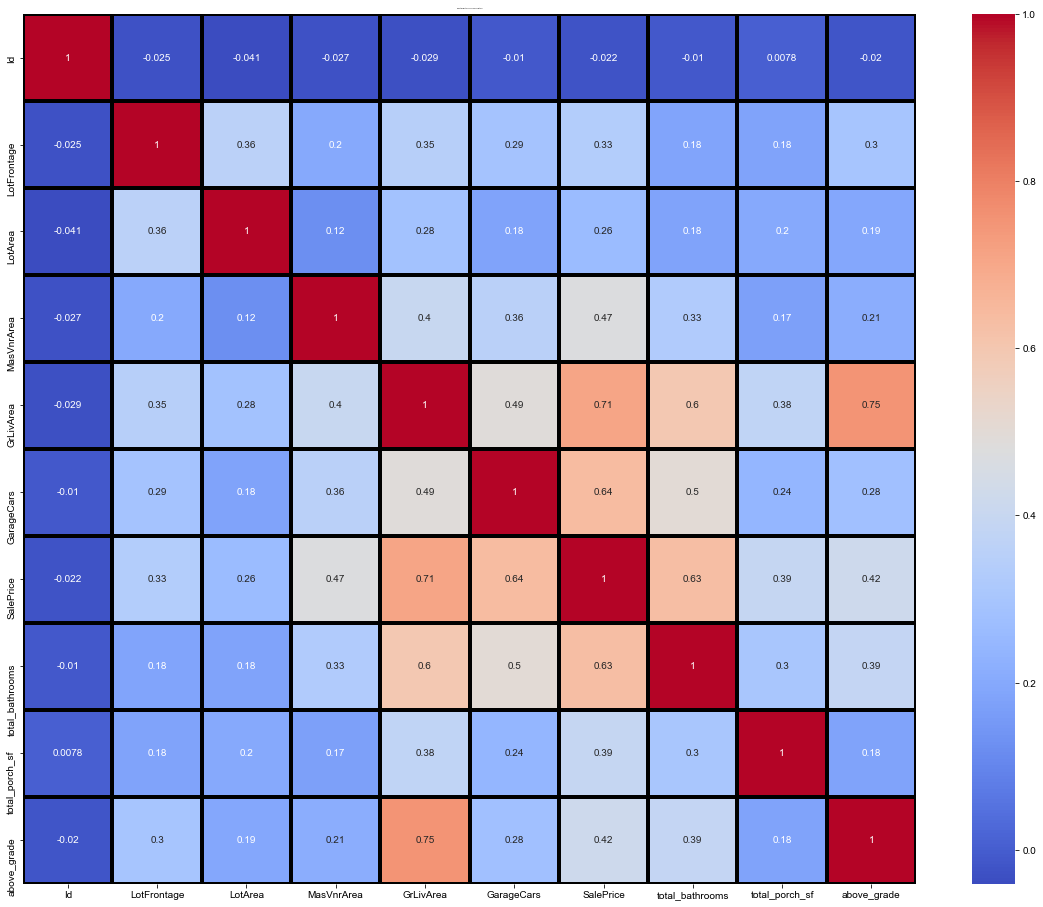

In [98]:
plt.figure(figsize=(20,16))
sns.heatmap(data.corr(), annot=True, linewidths=3,linecolor='k', cmap="coolwarm")
plt.title('heatmap to check correlation', fontsize=2)
sns.set(font_scale= 1.4)   ##heatmap defining correlation of different variables in data

In [99]:
obj_features=list(data.loc[:,data.dtypes=='object'].columns.values)
len(obj_features) 
##get object features to convert into numeric using dummy variable

42

In [100]:
##dummy variable
dummy_drop=[]
clean_data=data
for i in obj_features:
    dummy_drop+=[i + '_' +str(data[i].unique()[-1])]

In [101]:
data = pd.get_dummies(data,columns=obj_features)

In [102]:
data=data.drop(dummy_drop,axis=1)

In [103]:
data.shape

(2919, 239)

In [104]:
data.head(10)

Id  LotFrontage  LotArea  MasVnrArea  GrLivArea  GarageCars  SalePrice  \
0   1         65.0     8450       196.0       1710           2   208500.0   
1   2         80.0     9600         0.0       1262           2   181500.0   
2   3         68.0    11250       162.0       1786           2   223500.0   
3   4         60.0     9550         0.0       1717           3   140000.0   
4   5         84.0    14260       350.0       2198           3   250000.0   
5   6         85.0    14115         0.0       1362           2   143000.0   
6   7         75.0    10084       186.0       1694           2   307000.0   
7   8         68.0    10382       240.0       2090           2   200000.0   
8   9         51.0     6120         0.0       1774           2   129900.0   
9  10         50.0     7420         0.0       1077           1   118000.0   

   total_bathrooms  total_porch_sf  above_grade  MSSubClass_120  \
0              3.5              61           12               0   
1              2.5             298           10               0   
2              3.5              42           10               0   
3              2.0             307           11               0   
4              3.5             276           14               0   
5              2.5             390            7               0   
6              3.0             312           11               0   
7              3.5             667           11               0   
8              2.0             295           12               0   
9              2.0               4            9               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   
5               0               0               0              0   
6               0               0               0              1   
7               0               0               0              0   
8               0               0               0              0   
9               0               0               1              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   
5              0              0              0              1              0   
6              0              0              0              0              0   
7              0              0              0              0              1   
8              0              0              0              1              0   
9              0              0              0              0              0   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   
5              0              0              0              0              0   
6              0              0              0              0              0   
7              0              0              0              0              0   
8              0              0              0              0      

In [105]:
data.corr() ##Define important variables for prediction
##Select variables with correlation close to either -1 or 1 with price

Id  LotFrontage   LotArea  MasVnrArea  GrLivArea  \
Id                     1.000000    -0.024710 -0.040746   -0.026737  -0.029046   
LotFrontage           -0.024710     1.000000  0.361426    0.200474   0.348304   
LotArea               -0.040746     0.361426  1.000000    0.124728   0.284519   
MasVnrArea            -0.026737     0.200474  0.124728    1.000000   0.400088   
GrLivArea             -0.029046     0.348304  0.284519    0.400088   1.000000   
GarageCars            -0.010066     0.290631  0.180415    0.357659   0.489958   
SalePrice             -0.021917     0.334544  0.263843    0.472614   0.708624   
total_bathrooms       -0.010225     0.184085  0.182759    0.326066   0.597469   
total_porch_sf         0.007774     0.179316  0.199249    0.172340   0.375455   
above_grade           -0.020206     0.297636  0.193119    0.214147   0.754019   
MSSubClass_120         0.001190    -0.245962 -0.159257    0.025560  -0.078141   
MSSubClass_160        -0.001888    -0.385281 -0.205317    0.081035  -0.065483   
MSSubClass_180         0.002506    -0.145010 -0.075813   -0.031313  -0.095345   
MSSubClass_190         0.003021    -0.005999  0.054768   -0.068414   0.006611   
MSSubClass_20         -0.002825     0.248686  0.141910    0.048560  -0.222571   
MSSubClass_30          0.003908    -0.078440 -0.059962   -0.112773  -0.260102   
MSSubClass_40         -0.007630    -0.028224  0.005876   -0.025734  -0.025961   
MSSubClass_45         -0.042367    -0.050013 -0.031841   -0.044664  -0.088910   
MSSubClass_50          0.008623    -0.085365 -0.018557   -0.130984  -0.002881   
MSSubClass_60         -0.023720     0.171963  0.085534    0.165373   0.484658   
MSSubClass_70          0.022905    -0.045709 -0.013124   -0.118958   0.083262   
MSSubClass_75         -0.037278     0.020354  0.010144   -0.022580   0.135053   
MSSubClass_80          0.011822     0.063293  0.018671    0.005314  -0.041287   
MSSubClass_85          0.031729     0.015388 -0.010064   -0.026362  -0.116195   
MSSubClass_90          0.011740     0.012069 -0.019805   -0.017321   0.060440   
MSZoning_C (all)       0.018275    -0.014339 -0.021774   -0.052701  -0.067336   
MSZoning_FV           -0.011445    -0.087497 -0.102614    0.027140   0.035713   
MSZoning_RL           -0.010011     0.338827  0.245559    0.104142   0.131297   
MSZoning_RM            0.018675    -0.318132 -0.206661   -0.112915  -0.152687   
LotShape_IR1          -0.011150     0.122646  0.129776    0.123421   0.174855   
LotShape_IR2          -0.008471    -0.011074  0.181317    0.009755   0.071293   
LotShape_Reg           0.014503    -0.134068 -0.218736   -0.123936  -0.209063   
LandContour_Bnk       -0.008050     0.018163  0.031329   -0.050917   0.040977   
LandContour_Low       -0.022112     0.036328  0.306076   -0.021667  -0.005157   
LandContour_Lvl       -0.013725    -0.054269 -0.201801    0.000682  -0.079182   
LotConfig_Corner      -0.027614     0.229360  0.039444    0.006673   0.037906   
LotConfig_CulDSac     -0.011128    -0.080392  0.175712    0.063158   0.090710   
LotConfig_FR2         -0.018899    -0.050617  0.009397   -0.020357  -0.022851   
LotConfig_Inside       0.031458    -0.137711 -0.132097   -0.033483  -0.072396   
LandSlope_Gtl          0.017845    -0.045394 -0.228885   -0.019453  -0.026365   
LandSlope_Mod         -0.002074     0.036356  0.073786    0.017813   0.024313   
Neighborhood_Blmngtn  -0.013590    -0.074614 -0.084475   -0.032884  -0.018647   
Neighborhood_BrDale   -0.009521    -0.227519 -0.107613    0.149588  -0.077646   
Neighborhood_BrkSide  -0.018993    -0.108784 -0.079749   -0.099237  -0.102992   
Neighborhood_ClearCr  -0.040320     0.046843  0.230209   -0.008104   0.059568   
Neighborhood_CollgCr  -0.010301     0.024722 -0.006774   -0.006969  -0.002910   
Neighborhood_Crawfor   0.023574     0.004347  0.035943   -0.009737   0.083928   
Neighborhood_Edwards   0.017287    -0.026143  0.006342   -0.077564  -0.085970   
Neighborhood_Gilbert  -0.009054     0.035455  0.036449   -0.

## Outliers_Treatment


Feature: LotFrontage


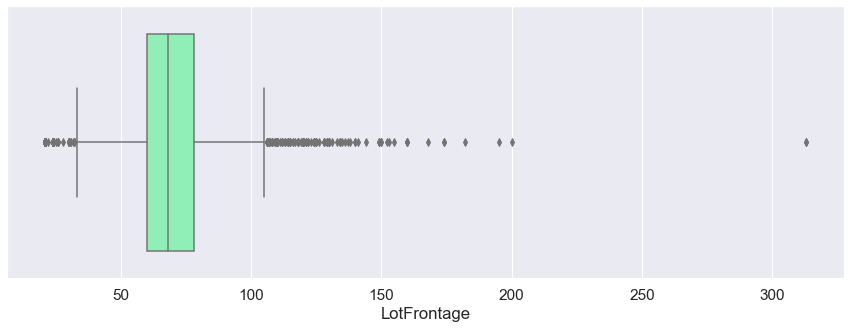

Feature: LotArea


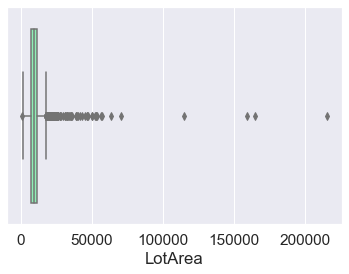

Feature: MasVnrArea


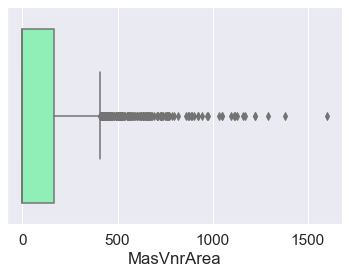

Feature: GrLivArea


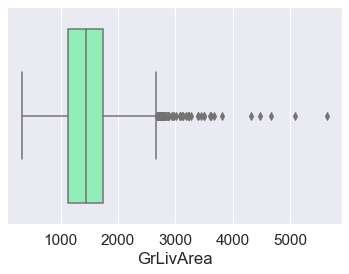

Feature: GarageCars


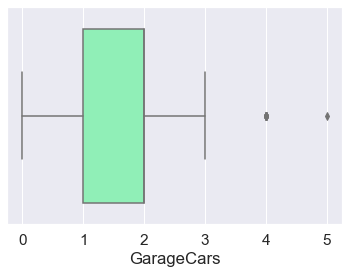

Feature: total_bathrooms


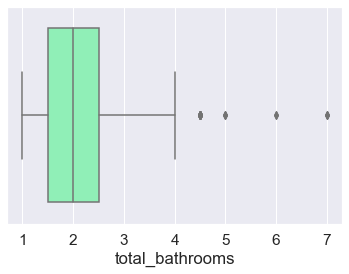

Feature: total_porch_sf


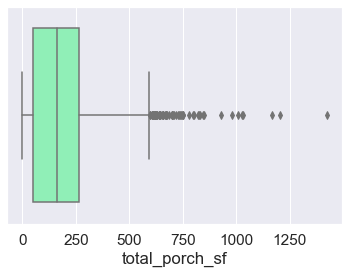

Feature: above_grade


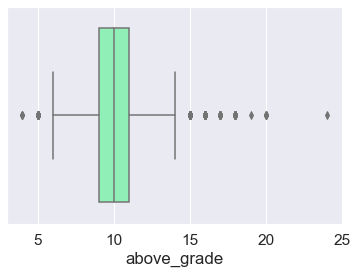

In [106]:
fig=plt.figure(figsize=(15,5))

for i in data.drop(['Id','MSSubClass_120','MSSubClass_160','MSSubClass_180','MSSubClass_190','MSSubClass_20','MSSubClass_30','MSSubClass_40','MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_70','MSSubClass_75','MSSubClass_80',
                    'MSSubClass_85','MSSubClass_90','MSZoning_C (all)','MSZoning_FV','MSZoning_RL','MSZoning_RM','LotShape_IR1','LotShape_IR2','LotShape_Reg','LandContour_Bnk','LandContour_Low','LandContour_Lvl','LotConfig_Corner','LotConfig_CulDSac','LotConfig_FR2',
                    'LotConfig_Inside','LandSlope_Gtl','LandSlope_Mod','Neighborhood_Blmngtn','Neighborhood_BrDale','Neighborhood_BrkSide','Neighborhood_ClearCr','Neighborhood_CollgCr','Neighborhood_Crawfor','Neighborhood_Edwards','Neighborhood_Gilbert','Neighborhood_IDOTRR','Neighborhood_MeadowV',
                    'Neighborhood_Mitchel','Neighborhood_NAmes','Neighborhood_NPkVill','Neighborhood_NWAmes','Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_OldTown','Neighborhood_SWISU','Neighborhood_Sawyer','Neighborhood_SawyerW','Neighborhood_Somerst','Neighborhood_StoneBr',
                    'Neighborhood_Timber','Neighborhood_Veenker','Condition1_Artery','Condition1_Feedr','Condition1_Norm','Condition1_PosA','Condition1_PosN','Condition1_RRAe','Condition1_RRAn','Condition1_RRNn','Condition2_Artery','Condition2_Feedr',
                    'Condition2_Norm','Condition2_PosA','Condition2_PosN','Condition2_RRAn','Condition2_RRNn','BldgType_1Fam','BldgType_2fmCon','BldgType_Duplex','BldgType_TwnhsE','HouseStyle_1.5Fin','HouseStyle_1.5Unf','HouseStyle_1Story','HouseStyle_2.5Unf',
                    'HouseStyle_2Story','HouseStyle_SFoyer','HouseStyle_SLvl','OverallQual_1','OverallQual_10','OverallQual_3','OverallQual_4','OverallQual_5','OverallQual_6','OverallQual_7','OverallQual_8','OverallQual_9','OverallCond_2',
                    'OverallCond_3','OverallCond_4','OverallCond_5','OverallCond_6','OverallCond_7','OverallCond_8','OverallCond_9','RoofStyle_Flat','RoofStyle_Gable','RoofStyle_Gambrel','RoofStyle_Hip','RoofStyle_Mansard','RoofMatl_CompShg',
                    'RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','RoofMatl_Tar&Grv','RoofMatl_WdShake','RoofMatl_WdShngl','Exterior1st_AsbShng','Exterior1st_AsphShn','Exterior1st_BrkComm','Exterior1st_BrkFace','Exterior1st_CemntBd',
                    'Exterior1st_HdBoard','Exterior1st_ImStucc','Exterior1st_MetalSd','Exterior1st_Plywood','Exterior1st_Stone','Exterior1st_Stucco','Exterior1st_VinylSd','Exterior1st_Wd Sdng','Exterior1st_WdShing','Exterior2nd_AsbShng','Exterior2nd_AsphShn',
                    'Exterior2nd_Brk Cmn','Exterior2nd_BrkFace','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_ImStucc','Exterior2nd_MetalSd','Exterior2nd_Other','Exterior2nd_Plywood','Exterior2nd_Stone','Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng',
                    'Exterior2nd_Wd Shng','MasVnrType_BrkFace','MasVnrType_None','MasVnrType_Stone','ExterQual_Ex','ExterQual_Gd','ExterQual_TA','ExterCond_Fa','ExterCond_Gd','ExterCond_Po','ExterCond_TA','Foundation_BrkTil','Foundation_CBlock','Foundation_PConc','Foundation_Slab',
                    'Foundation_Wood','BsmtQual_Ex','BsmtQual_Gd','BsmtQual_TA','BsmtCond_Fa','BsmtCond_Gd','BsmtCond_TA','BsmtExposure_Gd','BsmtExposure_Mn','BsmtExposure_No','BsmtFinType1_ALQ','BsmtFinType1_BLQ','BsmtFinType1_GLQ','BsmtFinType1_Rec','BsmtFinType1_Unf','BsmtFinType2_ALQ',
                    'BsmtFinType2_BLQ','BsmtFinType2_LwQ','BsmtFinType2_Rec','BsmtFinType2_Unf','Heating_GasA','Heating_GasW','Heating_Grav','Heating_OthW','Heating_Wall','HeatingQC_Ex','HeatingQC_Fa','HeatingQC_Gd','HeatingQC_TA','CentralAir_Y','Electrical_FuseA','Electrical_FuseF',
                    'Electrical_FuseP','Electrical_SBrkr','KitchenQual_Ex','KitchenQual_Gd','KitchenQual_TA','Functional_Maj1','Functional_Maj2','Functional_Min1','Functional_Min2','Functional_Mod','Functional_Typ','GarageType_Attchd','GarageType_Basment','GarageType_BuiltIn','GarageType_CarPort',
                    'GarageType_Detchd','GarageFinish_RFn','GarageFinish_Unf','GarageQual_Ex','GarageQual_Fa','GarageQual_Gd','GarageQual_TA','GarageCond_Fa','GarageCond_Gd','GarageCond_Po','GarageCond_TA','PavedDrive_N','PavedDrive_Y','SaleType_COD','SaleType_CWD','SaleType_Con','SaleType_ConLD',
                    'SaleType_ConLI','SaleType_ConLw','SaleType_New','SaleType_WD','SaleCondition_Abnorml','SaleCondition_AdjLand','SaleCondition_Alloca','SaleCondition_Normal','SaleCondition_Partial','hasfireplace_0','hasgarage_1','hasbsmt_1','SalePrice'], axis = 1):
    sns.boxplot(x=data[i],data=data,palette='rainbow',orient='h')
    print('Feature:',i)
    plt.show()

In [107]:
def outlier_treat(data):
    for i in data.columns: 
        if data[i].dtype == int or data[i].dtype == float:
            q1, q3 = np.percentile(data[i],[25,75]) 
            iqr = q3 - q1 
            lower = q1 - (1.5 * iqr) 
            upper = q3 + (1.5 * iqr) 
            data[i] = data[i].apply(lambda x : lower if x < lower 
                          else upper if x > upper else x)

            
outlier_treat(data)

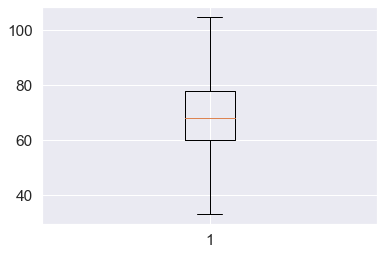

In [108]:
plt.boxplot(data['LotFrontage'])
plt.show()

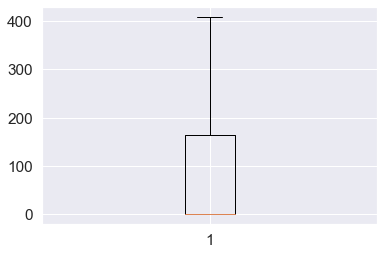

In [109]:
plt.boxplot(data['MasVnrArea'])
plt.show()

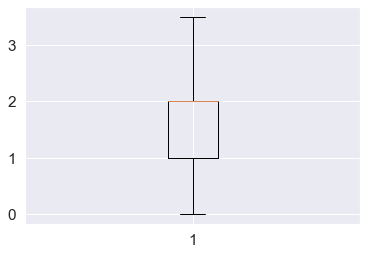

In [110]:
plt.boxplot(data['GarageCars'])
plt.show()

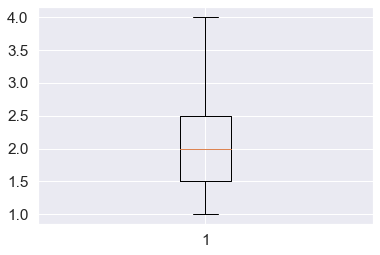

In [111]:
plt.boxplot(data['total_bathrooms'])
plt.show()

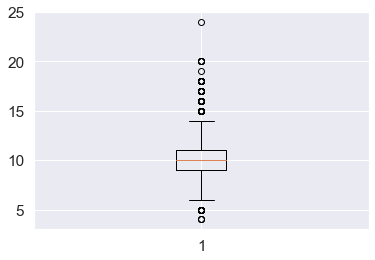

In [112]:
plt.boxplot(data['above_grade'])
plt.show()

In [113]:
q1,q3=np.percentile(data['above_grade'],[25,75])
iqr=q3-q1   
lower_fence=q1 - (1.5*iqr)
upper_fence=q3 + (1.5*iqr)
print('q1:',q1,'\nq3:',q3,'\niqr:',iqr,'\nlower_fence:',lower_fence,'\nupper_fence:',upper_fence)

q1: 9.0 
q3: 11.0 
iqr: 2.0 
lower_fence: 6.0 
upper_fence: 14.0


In [114]:
data["above_grade"] = np.where(data["above_grade"] < 6.0, 6.0,data["above_grade"])
data["above_grade"] = np.where(data["above_grade"] >14.0, 14.0,data["above_grade"])
print(data["above_grade"].skew())

0.1486130707923962


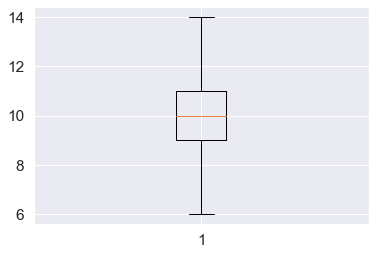

In [115]:
plt.boxplot(data['above_grade'])
plt.show()

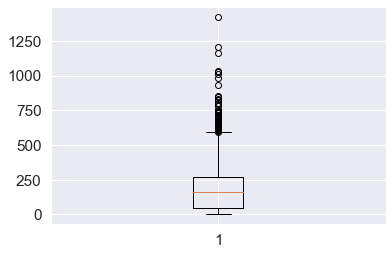

In [116]:
plt.boxplot(data['total_porch_sf'])
plt.show()

In [117]:
q1,q3=np.percentile(data['total_porch_sf'],[25,75])
iqr=q3-q1   
lower_fence=q1 - (1.5*iqr)
upper_fence=q3 + (1.5*iqr)
print('q1:',q1,'\nq3:',q3,'\niqr:',iqr,'\nlower_fence:',lower_fence,'\nupper_fence:',upper_fence)

q1: 48.0 
q3: 266.5 
iqr: 218.5 
lower_fence: -279.75 
upper_fence: 594.25


In [118]:
data["total_porch_sf"] = np.where(data["total_porch_sf"] >593.0, 593.0,data["total_porch_sf"])
print(data["total_porch_sf"].skew())

0.7734683498501524


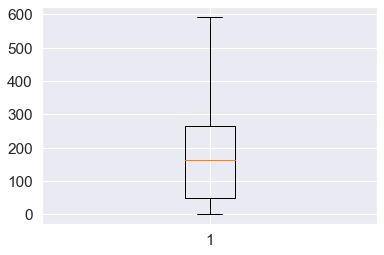

In [119]:
plt.boxplot(data['total_porch_sf'])
plt.show()

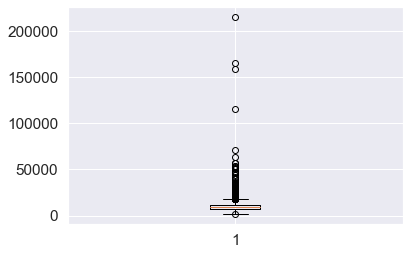

In [120]:
plt.boxplot(data['LotArea'])
plt.show()

In [121]:
q1,q3=np.percentile(data['LotArea'],[25,75])
iqr=q3-q1   
lower_fence=q1 - (1.5*iqr)
upper_fence=q3 + (1.5*iqr)
print('q1:',q1,'\nq3:',q3,'\niqr:',iqr,'\nlower_fence:',lower_fence,'\nupper_fence:',upper_fence)

q1: 7478.0 
q3: 11570.0 
iqr: 4092.0 
lower_fence: 1340.0 
upper_fence: 17708.0


In [122]:
data["LotArea"] = np.where(data["LotArea"] <17708.0, 17708.0,data["LotArea"])
print(data["LotArea"].skew())

21.056172328324887


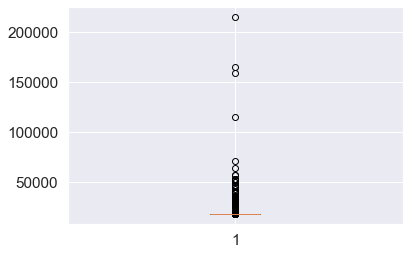

In [123]:
plt.boxplot(data['LotArea'])
plt.show()

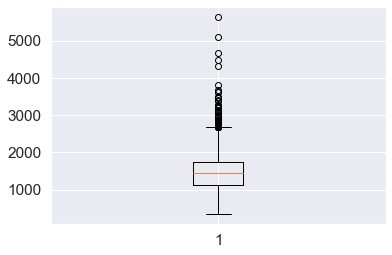

In [124]:
plt.boxplot(data['GrLivArea'])
plt.show()

In [125]:
q1,q3=np.percentile(data['GrLivArea'],[25,75])
iqr=q3-q1   
lower_fence=q1 - (1.5*iqr)
upper_fence=q3 + (1.5*iqr)
print('q1:',q1,'\nq3:',q3,'\niqr:',iqr,'\nlower_fence:',lower_fence,'\nupper_fence:',upper_fence)

q1: 1126.0 
q3: 1743.5 
iqr: 617.5 
lower_fence: 199.75 
upper_fence: 2669.75


In [126]:
data["GrLivArea"] = np.where(data["GrLivArea"] <2669.75, 2669.75,data["GrLivArea"])
print(data["GrLivArea"].skew())

17.06095887203272


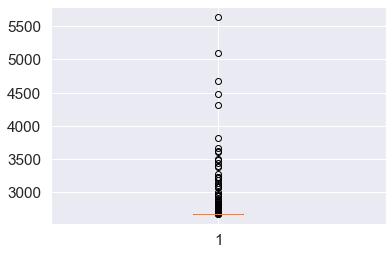

In [127]:
plt.boxplot(data['GrLivArea'])
plt.show()

## Scaling of numerical_variables

In [128]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

min_max = MinMaxScaler()
col_to_scale = ['LotFrontage', 'LotArea', 'MasVnrArea','total_porch_sf','above_grade', 'total_bathrooms','GrLivArea','GarageCars']
data[col_to_scale] = min_max.fit_transform(data[col_to_scale])
data.head()

Id  LotFrontage  LotArea  MasVnrArea  GrLivArea  GarageCars  SalePrice  \
0   1     0.444444      0.0    0.479511        0.0    0.571429   208500.0   
1   2     0.652778      0.0    0.000000        0.0    0.571429   181500.0   
2   3     0.486111      0.0    0.396330        0.0    0.571429   223500.0   
3   4     0.375000      0.0    0.000000        0.0    0.857143   140000.0   
4   5     0.708333      0.0    0.856269        0.0    0.857143   250000.0   

   total_bathrooms  total_porch_sf  above_grade  MSSubClass_120  \
0         0.833333        0.102867        0.750               0   
1         0.500000        0.502530        0.500               0   
2         0.833333        0.070826        0.500               0   
3         0.333333        0.517707        0.625               0   
4         0.833333        0.465430        1.000               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
0                 0            0            1            0             0   
1                 0            0            1            0             0   
2                 0            0            1            0             1   
3                 0            0            1            0             1   
4                 0            0            1            0             1   

   LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 1                  0              0   
4                1                 0                  0              1   

   LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  Neighborhood_Blmngtn  \
0                 1              1              0                     0   
1                 0              1              0                     0   
2                 1              1              0                     0   
3                 0              1              0                     0   
4                 0              1              0                     0   

   Neighbo

##  Machine Learning Model Building

In [133]:
display(len(train),len(test))

1460

1459

In [134]:
train_final=data[:1460]
test_final=data[1460:]

In [135]:
display(len(train_final),len(test_final))

1460

1459

In [136]:
display(train_final.shape,test_final.shape)

(1460, 239)

(1459, 239)

In [137]:
X = train_final.drop(['SalePrice'],axis=1)
Y = train_final['SalePrice']   
display(X.head(), Y.head())

Id  LotFrontage  LotArea  MasVnrArea  GrLivArea  GarageCars  \
0   1     0.444444      0.0    0.479511        0.0    0.571429   
1   2     0.652778      0.0    0.000000        0.0    0.571429   
2   3     0.486111      0.0    0.396330        0.0    0.571429   
3   4     0.375000      0.0    0.000000        0.0    0.857143   
4   5     0.708333      0.0    0.856269        0.0    0.857143   

   total_bathrooms  total_porch_sf  above_grade  MSSubClass_120  \
0         0.833333        0.102867        0.750               0   
1         0.500000        0.502530        0.500               0   
2         0.833333        0.070826        0.500               0   
3         0.333333        0.517707        0.625               0   
4         0.833333        0.465430        1.000               0   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              0   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              1   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              0   
4              0              0              0              0              1   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              1              0              0              0              0   
4              0              0              0              0              0   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
0                 0            0            1            0             0   
1                 0            0            1            0             0   
2                 0            0            1            0             1   
3                 0            0            1            0             1   
4                 0            0            1            0             1   

   LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 1                  0              0   
4                1                 0                  0              1   

   LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  Neighborhood_Blmngtn  \
0                 1              1              0                     0   
1                 0              1              0                     0   
2                 1              1              0                     0   
3                 0              1              0                     0   
4                 0              1              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0     

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=41)

In [139]:
X_train.head()

Id  LotFrontage  LotArea  MasVnrArea  GrLivArea  GarageCars  \
741    742     0.444444      0.0    0.000000        0.0    0.285714   
1161  1162     0.486111      0.0    0.176147        0.0    0.571429   
156    157     0.375000      0.0    0.000000        0.0    0.571429   
1241  1242     0.694444      0.0    0.000000        0.0    0.857143   
1042  1043     0.013889      0.0    0.330275        0.0    0.571429   

      total_bathrooms  total_porch_sf  above_grade  MSSubClass_120  \
741          0.500000        0.283305        0.375               0   
1161         0.333333        0.546374        0.625               0   
156          0.000000        0.000000        0.250               0   
1241         0.333333        0.094435        0.625               0   
1042         0.666667        0.392917        0.125               1   

      MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
741                0               0               0              1   
1161               0               0               0              1   
156                0               0               0              1   
1241               0               0               0              1   
1042               0               0               0              0   

      MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
741               0              0              0              0   
1161              0              0              0              0   
156               0              0              0              0   
1241              0              0              0              0   
1042              0              0              0              0   

      MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
741               0              0              0              0   
1161              0              0              0              0   
156               0              0              0              0   
1241              0              0              0              0   
1042              0              0              0              0   

      MSSubClass_85  MSSubClass_90  MSZoning_C (all)  MSZoning_FV  \
741               0              0                 0            0   
1161              0              0                 0            0   
156               0              0                 0            0   
1241              0              0                 0            0   
1042              0              0                 0            0   

      MSZoning_RL  MSZoning_RM  LotShape_IR1  LotShape_IR2  LotShape_Reg  \
741             1            0             1             0             0   
1161            1            0             1             0             0   
156             1            0             0             0             1   
1241            1            0             0             0             1   
1042            1            0             1             0             0   

      LandContour_Bnk  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
741                 0                0                1                 0   
1161                0                1                0                 0   
156                 0                0                1                 0   
1241                0                0                1                 0   
1042                0                0                1                 0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_Inside  LandSlope_Gtl  \
741                   0              0                 1              1   
1161                  1              0                 0              1   
156                   0              0                 1              1   
1241                  0              0                 1              1   
1042                  0              0                 1              1   

      LandSlope_Mod  Neighborhood_Blmngtn  Neighborhood_BrDale  \
741               0                     0                    0 

In [140]:
Y_train.head()

741     142000.0
1161    224000.0
156     109500.0
1241    248328.0
1042    196000.0
Name: SalePrice, dtype: float64

In [141]:
##For predictive analysis, We first split data into two groups training data and testing data(For this case train_data = 80% and test_data=20%)
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,Y_train)  ##Training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [142]:
##Price prediction based on X_test data
price_predict = lr.predict(X_test)
price_predict = np.round(price_predict,2)
price_predict_df = pd.DataFrame({'Predicted_price':price_predict})

In [143]:
##Printing first 10 values of price prediction dataframe
print(price_predict_df.head(10))

   Predicted_price
0        263283.93
1        187884.48
2        185203.83
3        185759.28
4        139093.70
5        172485.95
6        206660.16
7         85730.31
8        197189.30
9        123928.53


In [144]:
##Accuracy percentage using Y_test data
##Here R^2 method is used to evaluate the model
accuracy = r2_score(Y_test,price_predict)
print("The accuracy of the model based on current test data: ",accuracy*100,"%")

The accuracy of the model based on current test data:  53.342350636992094 %


In [145]:
print('MAE: ',mean_absolute_error(Y_test, price_predict))

print('MSE: ', mean_squared_error(Y_test, price_predict))

print('RMSE: ',np.sqrt(mean_squared_error(Y_test, price_predict)))


MAE:  22820.629566210046
MSE:  2408528219.439448
RMSE:  49076.75844470016


In [146]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

rf=RandomForestRegressor(n_estimators=250)

##For Multi-class Classification--->target_variable--->Price

rf.fit(X_train,Y_train)

Y_predict = rf.predict(X_test)

Y_predict = np.round(Y_predict,2)

Y_predict_df = pd.DataFrame({'Predicted_price':Y_predict})

In [147]:
##Printing first 10 values of price prediction dataframe
print(Y_predict_df.head(10))

   Predicted_price
0        200791.62
1        221727.19
2        197760.04
3        181114.31
4        151802.81
5        177613.33
6        181801.14
7         70029.13
8        204162.10
9        135156.05


In [148]:
accuracy = r2_score(Y_test,Y_predict)
print("The accuracy of the model based on current test data: ",accuracy*100,"%")

The accuracy of the model based on current test data:  85.06250423704783 %


In [149]:
print('MAE: ',mean_absolute_error(Y_test, Y_predict))

print('MSE: ', mean_squared_error(Y_test, Y_predict))

print('RMSE: ',np.sqrt(mean_squared_error(Y_test, Y_predict)))

MAE:  19251.18888127854
MSE:  771092855.3840053
RMSE:  27768.55875597445


In [151]:
X_validate = test_final.drop(['SalePrice'],axis=1)
Y_validate = test_final['SalePrice']   
display(X_validate.head(), Y_validate.head())

Id  LotFrontage  LotArea  MasVnrArea  GrLivArea  GarageCars  \
0  1461     0.652778      0.0     0.00000        0.0    0.285714   
1  1462     0.666667      0.0     0.26422        0.0    0.285714   
2  1463     0.569444      0.0     0.00000        0.0    0.571429   
3  1464     0.625000      0.0     0.04893        0.0    0.571429   
4  1465     0.138889      0.0     0.00000        0.0    0.571429   

   total_bathrooms  total_porch_sf  above_grade  MSSubClass_120  \
0         0.000000        0.438449        0.250               0   
1         0.166667        0.723440        0.500               0   
2         0.500000        0.414840        0.500               0   
3         0.500000        0.667791        0.625               0   
4         0.333333        0.381113        0.250               1   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              1   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              0   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
0                 0            0            0            0             0   
1                 0            0            1            0             1   
2                 0            0            1            0             1   
3                 0            0            1            0             1   
4                 0            0            1            0             1   

   LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_Low  \
0             0             1                0                0   
1             0             0                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 1                  0              0   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                0                 0                  0              0   

   LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  Neighborhood_Blmngtn  \
0                 1              1              0                     0   
1                 0              1              0                     0   
2                 1              1              0                     0   
3                 1              1              0                     0   
4                 1              1              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: SalePrice, dtype: float64

In [152]:
status=rf.predict(X_validate)

In [153]:
np.round(status,2)

status_df = pd.DataFrame({'Predicted_price':status})

In [154]:
##Printing first 10 values of price prediction dataframe
print(status_df.head(10))

   Predicted_price
0       122450.040
1       141807.036
2       177921.400
3       193102.464
4       194954.160
5       182202.400
6       182295.456
7       179443.960
8       187768.724
9       130273.288


In [155]:
test_final["PREDICTED_PRICE"]=status_df
test_final.head()

Id  LotFrontage  LotArea  MasVnrArea  GrLivArea  GarageCars  SalePrice  \
0  1461     0.652778      0.0     0.00000        0.0    0.285714        NaN   
1  1462     0.666667      0.0     0.26422        0.0    0.285714        NaN   
2  1463     0.569444      0.0     0.00000        0.0    0.571429        NaN   
3  1464     0.625000      0.0     0.04893        0.0    0.571429        NaN   
4  1465     0.138889      0.0     0.00000        0.0    0.571429        NaN   

   total_bathrooms  total_porch_sf  above_grade  MSSubClass_120  \
0         0.000000        0.438449        0.250               0   
1         0.166667        0.723440        0.500               0   
2         0.500000        0.414840        0.500               0   
3         0.500000        0.667791        0.625               0   
4         0.333333        0.381113        0.250               1   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              1   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              0   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
0                 0            0            0            0             0   
1                 0            0            1            0             1   
2                 0            0            1            0             1   
3                 0            0            1            0             1   
4                 0            0            1            0             1   

   LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_Low  \
0             0             1                0                0   
1             0             0                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 1                  0              0   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                0                 0                  0              0   

   LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  Neighborhood_Blmngtn  \
0                 1              1              0                     0   
1                 0              1              0                     0   
2                 1              1              0                     0   
3                 1              1              0                     0   
4                 1              1              0                     0   



In [157]:
test_final.drop(['SalePrice'],axis=1,inplace=True)
test_final.head()

Id  LotFrontage  LotArea  MasVnrArea  GrLivArea  GarageCars  \
0  1461     0.652778      0.0     0.00000        0.0    0.285714   
1  1462     0.666667      0.0     0.26422        0.0    0.285714   
2  1463     0.569444      0.0     0.00000        0.0    0.571429   
3  1464     0.625000      0.0     0.04893        0.0    0.571429   
4  1465     0.138889      0.0     0.00000        0.0    0.571429   

   total_bathrooms  total_porch_sf  above_grade  MSSubClass_120  \
0         0.000000        0.438449        0.250               0   
1         0.166667        0.723440        0.500               0   
2         0.500000        0.414840        0.500               0   
3         0.500000        0.667791        0.625               0   
4         0.333333        0.381113        0.250               1   

   MSSubClass_160  MSSubClass_180  MSSubClass_190  MSSubClass_20  \
0               0               0               0              1   
1               0               0               0              1   
2               0               0               0              0   
3               0               0               0              0   
4               0               0               0              0   

   MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              0   

   MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  \
0              0              0              0              0              0   
1              0              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RL  MSZoning_RM  LotShape_IR1  \
0                 0            0            0            0             0   
1                 0            0            1            0             1   
2                 0            0            1            0             1   
3                 0            0            1            0             1   
4                 0            0            1            0             1   

   LotShape_IR2  LotShape_Reg  LandContour_Bnk  LandContour_Low  \
0             0             1                0                0   
1             0             0                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 1                  0              0   
2                1                 0                  0              0   
3                1                 0                  0              0   
4                0                 0                  0              0   

   LotConfig_Inside  LandSlope_Gtl  LandSlope_Mod  Neighborhood_Blmngtn  \
0                 1              1              0                     0   
1                 0              1              0                     0   
2                 1              1              0                     0   
3                 1              1              0                     0   
4                 1              1              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr